# Telecom Churn Case Study
       - Tinnaluri Naresh
       - Ashwin Krishnan

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Understanding the business objective and the data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Steps to Build Model:

1. Data Sourcing 
2. Data Understanding
3. Data cleaning and Derived Metrics
4. Exploratory Data Analysis (Univariate, Bivariate Analysis)
5. Model Preparation
     - Train and Test Data Split
     - Data Normalization
     - Handling Class Imbalance
6. Model Building
7. Residual Analysis of the Train Data
8. Making Predictions
9. Model Evaluation
10. Final Inference

### Importing Libraries

In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [575]:
# Reading CSV file:

telecom = pd.read_csv('telecom_churn_data.csv')

In [576]:
# Displaying the head of dataset: 

telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [577]:
# Displaying the columns in the dataset:

telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [578]:
# Displaying the information of the dataset:

telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [579]:
# Displaying the data dictionary terms used in the data set:

telecom_datadict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [580]:
# Displaying the dictionary:

telecom_datadict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [581]:
# Describing the data set:

telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [582]:
# selecting all the columns with datetime format:

date_col = telecom.select_dtypes(include=[object])
date_col

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,NaN,NaN,NaN
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [583]:
# converting into datetime format:

for i in date_col.columns:
    telecom[i] = pd.to_datetime(telecom[i])
    
telecom.shape

(99999, 226)

In [584]:
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

In [585]:
# check null values:

null_values = round((telecom.isnull().sum()/len(telecom.index))*100,2).sort_values(ascending=False)
null_values

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64

In [586]:
# null values greater than 70 percent:
 
null_values[null_values >70]

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

from the above rates we see that there are a couple of columns which have over 70% of data missing. We can drop these columns as they would convey on a little info.

Yet, a vital highlight consider here is that we need to characterize **high-value customers** as - Those who have recharged with a amount more than or equivalent to X, where X is the 70th percentile of the average recharge amount in the initial two months. 

So we need to deal with these columns so we don't drop the columns identified with the recharge amounts. In this way to try not to do that first we need to manage the missing data in these columns - 

 total_rech_data_6 - 75 % missing values

 total_rech_data_7 - 74 % missing values

 av_rech_amt_data_6 - 75 % missing values

 av_rech_amt_data_7 - 74 % missing values

 date_of_last_rech_data_6 - 75 % missing qualities 

 date_of_last_rech_data_7 - 74 % missing qualities 


In [587]:
# Displaying missing values with respect to data recharge attributes

telecom[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']]

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
...,...,...,...
99994,NaT,NaN,NaN
99995,NaT,NaN,NaN
99996,2014-06-13,2.0,25.0
99997,2014-06-17,3.0,202.0


In [588]:
#if columns - 'total_rech_data_6' and 'date_of_last_rech_data_6'  
# have null values at the same index. If yes, then that would mean there was no data recharge done for that month
# and we can impute the 'total_rech_data_6' value with 0.

total_rech_data_6_null = telecom['total_rech_data_6'].isnull()
date_of_last_rech_data_6_null = telecom['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_null.equals(date_of_last_rech_data_6_null):
    print('The NULL values for month 6 are equal')

The NULL values for month 6 are equal


So, we see that the two columns are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0 and total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.`

In [589]:
telecom['total_rech_data_6'].fillna(0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(0, inplace=True)

We will follow the same logic for 'total_rech_data_7', av_rech_amt_data_7,  'total_rech_data_8' & 'av_rech_amt_data_8' columns as well.

In [590]:
total_rech_data_7_null = telecom['total_rech_data_7'].isnull()
date_of_last_rech_data_7_null = telecom['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_null.equals(date_of_last_rech_data_7_null):
    print('The  NULL values for month 7 are equal')

The  NULL values for month 7 are equal


In [591]:
total_rech_data_8_null = telecom['total_rech_data_8'].isnull()
date_of_last_rech_data_8_null = telecom['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_null.equals(date_of_last_rech_data_8_null):
    print('The  NULL values for month 8 are equal')

The  NULL values for month 8 are equal


we can impute 0 for each of 'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' & 'av_rech_amt_data_8' columns as well.

In [592]:
# Month 7
telecom['total_rech_data_7'].fillna(0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(0, inplace=True)

# Month 8
telecom['total_rech_data_8'].fillna(0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(0, inplace=True)

In [593]:
# Lets check missing values:

round((telecom.isnull().sum()/ len(telecom.index)* 100),2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [594]:
# check how many columns have more than 70% of missing values

cols_70_percent_missing_data = ((telecom.isnull().sum()/ len(telecom)) * 100) >= 70
cols_70_percent_missing_data.sum()

34

In [595]:
# there are 34 columns where 70% data is missing
# dropping the columns now is bad idea, first we have to filter out the high valued customers.

In [596]:
# Displaying the dictionary:

telecom_datadict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


# New Feature Creation:

We gonna create a new feature that is 'total data recharge amount' from the existing features,   
 'total_rech_data' and 'av_rech_amt_data'  
 
 total data recharge amount = total_rech_data * av_rech_amt_data

In [597]:
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_data_rech_amt_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

In [598]:
# lets check the features:

telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_data_rech_amt_8','total_data_rech_amt_9']]

,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,252.0,252.0,252.0,NaN
1,0.0,154.0,100.0,NaN
2,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,NaN
4,56.0,0.0,0.0,NaN
...,...,...,...,...
99994,0.0,0.0,0.0,NaN
99995,0.0,0.0,0.0,NaN
99996,78.0,0.0,0.0,NaN
99997,1749.0,716.0,2864.0,3448.0


# Filter High Value Customers:

We have to predict the churn only for the high value customers.  
High value customers are defined as   
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [599]:
# Lets compute the average recharge amount for the month 6 & 7. 
# This total amount is equal to the sum of talk time recharge and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = telecom[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  239.0


In [600]:
# Filtering the high values

telecom = telecom[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [601]:
telecom.shape

(30001, 230)

In [602]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,NaN
8,7001524846,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN
21,7002124215,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
23,7000887461,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0


So after filtering out the high-value customers we are left with 30027 observations. The shape of the telecom dataset is now (30001, 230)

In [603]:
# reset the data frame indexes:

telecom = telecom.reset_index(drop=True)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
1,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,NaN
2,7001524846,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,NaN
3,7002124215,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN
4,7000887461,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,252.0


In [604]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# Tag churners and remove attributes of the churn phase 

Now to tag churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:  

total_ic_mou_9  
total_og_mou_9  
vol_2g_mb_9  
vol_3g_mb_9  
We will create a temporary dataset that stores all the features related to the tagging a customer as churn. We will use the above attributes mentioned.

In [605]:
churn_parameters_data = telecom[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']]
churn_parameters_data.head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


In [606]:
# So any customer who does not use any of the facility (calls or mobile data) during the 9th month, 
# will have the row sum for the attributes equal to zero.
# This customer can be tagged as Churn (1) else the customer will be tagged as Not Churn (0).

In [607]:
telecom['churn'] = telecom.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) and (x.total_og_mou_9 == 0) and (x.vol_2g_mb_9 == 0) and (x.vol_3g_mb_9 == 0)) else 0, axis=1)

In [608]:
telecom['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

0    91.863605
1     8.136395
Name: churn, dtype: float64


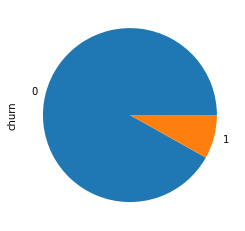

In [609]:
# Visualize churn and non churn:

print((telecom['churn'].value_counts()/len(telecom))*100)

((telecom['churn'].value_counts()/len(telecom))*100).plot(kind="pie")

plt.show()

In [610]:
# We will try to get all the columns in the 'telecom_data' dataset where the column have '_9' in the name.

cols_with__9 = [col for col in telecom.columns if '_9' in col]
cols_with__9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [611]:
# we gonna drop the above list of columns 

In [612]:
print("Total number of columns to be dropped  - ", len(cols_with__9))

Total number of columns to be dropped  -  56


In [613]:
telecom.drop(cols_with__9, axis=1, inplace = True)

In [614]:
telecom.shape

(30001, 175)

In [615]:
# after dropping, we have 175 columns

In [616]:
# Lets check null values:

(telecom.isnull().sum(axis = 0)/ len(telecom)) * 100

mobile_number            0.000000
circle_id                0.000000
loc_og_t2o_mou           0.746642
std_og_t2o_mou           0.746642
loc_ic_t2o_mou           0.746642
                           ...   
vbc_3g_6                 0.000000
total_data_rech_amt_6    0.000000
total_data_rech_amt_7    0.000000
total_data_rech_amt_8    0.000000
churn                    0.000000
Length: 175, dtype: float64

In [617]:
# lets check how many columns have more than 40% data missing.

total_cols_with_atleast_40_percent_missing_data = ((telecom.isnull().sum()/ len(telecom)) * 100) >= 40
total_cols_with_atleast_40_percent_missing_data.sum()

24

In [618]:
# the feature names which have more than 40% missing data.

cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'],
      dtype='object')

'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'  

For the columns which have date values missing, we cannot impute any date arbitrarily.`   
Also with almost 50% of date values not present for these columns we can safely drop these columns.

In [619]:
telecom.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)

Lets check these 'max_rech_data_6', 'max_rech_data_7' & 'max_rech_data_8' missing values

In [620]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    telecom[col].fillna(0, inplace=True)

In [621]:
# Month 6

arpu_3g_6_null = telecom['arpu_3g_6'].isnull()
night_pck_user_6_null = telecom['night_pck_user_6'].isnull()
count_rech_2g_6_null = telecom['count_rech_2g_6'].isnull()
count_rech_3g_6_null = telecom['count_rech_3g_6'].isnull()
fb_user_6_null = telecom['fb_user_6'].isnull()

if arpu_3g_6_null.equals(night_pck_user_6_null) & night_pck_user_6_null.equals(count_rech_2g_6_null) & count_rech_2g_6_null.equals(count_rech_3g_6_null) &  count_rech_3g_6_null.equals(fb_user_6_null):
    print('The  NULL values for month 6 are equal')



The  NULL values for month 6 are equal


In [622]:
# Month 7

arpu_3g_7_null = telecom['arpu_3g_7'].isnull()
night_pck_user_7_null = telecom['night_pck_user_7'].isnull()
count_rech_2g_7_null = telecom['count_rech_2g_7'].isnull()
count_rech_3g_7_null = telecom['count_rech_3g_7'].isnull()
fb_user_7_null = telecom['fb_user_7'].isnull()

if arpu_3g_7_null.equals(night_pck_user_7_null) & night_pck_user_7_null.equals(count_rech_2g_7_null) & count_rech_2g_7_null.equals(count_rech_3g_7_null) &  count_rech_3g_7_null.equals(fb_user_7_null):
    print('The  NULL values for month 7 are equal')



The  NULL values for month 7 are equal


In [623]:
# Month 8

arpu_3g_8_null = telecom['arpu_3g_8'].isnull()
night_pck_user_8_null = telecom['night_pck_user_8'].isnull()
count_rech_2g_8_null = telecom['count_rech_2g_8'].isnull()
count_rech_3g_8_null = telecom['count_rech_3g_8'].isnull()
fb_user_8_null = telecom['fb_user_8'].isnull()

if arpu_3g_8_null.equals(night_pck_user_8_null) & night_pck_user_8_null.equals(count_rech_2g_8_null) & count_rech_2g_8_null.equals(count_rech_3g_8_null) &  count_rech_3g_8_null.equals(fb_user_8_null):
    print('The NULL values for month 8 are equal')



The NULL values for month 8 are equal


In [624]:
# mobile internet usage having a missing value would mostly mean that the customer is not using that particular service. 
# This would also mean that the person would not be using any add-on services that would require a mobile internet pack.
# So with this inference we can impute the missing values related to columns for mobile data with 0.

In [625]:
# From the above inferences let's impute the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom[columns_to_impute] = telecom[columns_to_impute].fillna(0)

In [626]:
telecom[columns_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rech_2g_6   30001 non-null  float64
 1   count_rech_2g_7   30001 non-null  float64
 2   count_rech_2g_8   30001 non-null  float64
 3   count_rech_3g_6   30001 non-null  float64
 4   count_rech_3g_7   30001 non-null  float64
 5   count_rech_3g_8   30001 non-null  float64
 6   arpu_3g_6         30001 non-null  float64
 7   arpu_3g_7         30001 non-null  float64
 8   arpu_3g_8         30001 non-null  float64
 9   arpu_2g_6         30001 non-null  float64
 10  arpu_2g_7         30001 non-null  float64
 11  arpu_2g_8         30001 non-null  float64
 12  night_pck_user_6  30001 non-null  float64
 13  night_pck_user_7  30001 non-null  float64
 14  night_pck_user_8  30001 non-null  float64
 15  fb_user_6         30001 non-null  float64
 16  fb_user_7         30001 non-null  float6

In [627]:
#  let's check if we have any columns with zero variance 
#  if any variable has zero variance, it would have no impact during the analysis. We will drop duch columns.

# Variance  - df.var() method

columns_with_0_variance = telecom.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)


columns_with_1_unique_value = telecom.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  10
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')
Total columns with only ONE unique value are -  13
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [628]:
# Dropping the non - date columns 

telecom.drop(column_name_with_0_variance, axis=1, inplace = True)

In [629]:
telecom.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,...,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,7001524846,2014-06-30,2014-07-31,2014-08-31,378.721,492.223,137.362,413.69,351.03,35.08,...,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,7002124215,2014-06-30,2014-07-31,2014-08-31,514.453,597.753,637.760,102.41,132.11,85.14,...,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,7000887461,2014-06-30,2014-07-31,2014-08-31,74.350,193.897,366.966,48.96,50.66,33.58,...,1.0,1.0,604,40.45,51.86,0.00,0.0,712.0,540.0,0


In [630]:
# columns with missing values 

columns_with_null_values = telecom.columns[telecom.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'last_date_of_month_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',

In [631]:
cols_with_null_values_for_month_6 = [col for col in columns_with_null_values if '_6' in col]

telecom[cols_with_null_values_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   onnet_mou_6          29456 non-null  float64       
 1   offnet_mou_6         29456 non-null  float64       
 2   roam_ic_mou_6        29456 non-null  float64       
 3   roam_og_mou_6        29456 non-null  float64       
 4   loc_og_t2t_mou_6     29456 non-null  float64       
 5   loc_og_t2m_mou_6     29456 non-null  float64       
 6   loc_og_t2f_mou_6     29456 non-null  float64       
 7   loc_og_t2c_mou_6     29456 non-null  float64       
 8   loc_og_mou_6         29456 non-null  float64       
 9   std_og_t2t_mou_6     29456 non-null  float64       
 10  std_og_t2m_mou_6     29456 non-null  float64       
 11  std_og_t2f_mou_6     29456 non-null  float64       
 12  std_og_mou_6         29456 non-null  float64       
 13  isd_og_mou_6         29456 non-

In [632]:
# if any value is missing means that the minutes of usage is missing and can be imputed with 0.

# The same would apply for the columns pointing to months 7 & 8 aswell.

In [633]:
# Month 7
cols_with_null_values_for_month_7 = [col for col in columns_with_null_values if '_7' in col]
print(telecom[cols_with_null_values_for_month_7].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_date_of_month_7  29974 non-null  datetime64[ns]
 1   onnet_mou_7           29464 non-null  float64       
 2   offnet_mou_7          29464 non-null  float64       
 3   roam_ic_mou_7         29464 non-null  float64       
 4   roam_og_mou_7         29464 non-null  float64       
 5   loc_og_t2t_mou_7      29464 non-null  float64       
 6   loc_og_t2m_mou_7      29464 non-null  float64       
 7   loc_og_t2f_mou_7      29464 non-null  float64       
 8   loc_og_t2c_mou_7      29464 non-null  float64       
 9   loc_og_mou_7          29464 non-null  float64       
 10  std_og_t2t_mou_7      29464 non-null  float64       
 11  std_og_t2m_mou_7      29464 non-null  float64       
 12  std_og_t2f_mou_7      29464 non-null  float64       
 13  std_og_mou_7    

In [634]:
# Month 8
cols_with_null_values_for_month_8 = [col for col in columns_with_null_values if '_8' in col]
print(telecom[cols_with_null_values_for_month_8].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_date_of_month_8  29836 non-null  datetime64[ns]
 1   onnet_mou_8           28827 non-null  float64       
 2   offnet_mou_8          28827 non-null  float64       
 3   roam_ic_mou_8         28827 non-null  float64       
 4   roam_og_mou_8         28827 non-null  float64       
 5   loc_og_t2t_mou_8      28827 non-null  float64       
 6   loc_og_t2m_mou_8      28827 non-null  float64       
 7   loc_og_t2f_mou_8      28827 non-null  float64       
 8   loc_og_t2c_mou_8      28827 non-null  float64       
 9   loc_og_mou_8          28827 non-null  float64       
 10  std_og_t2t_mou_8      28827 non-null  float64       
 11  std_og_t2m_mou_8      28827 non-null  float64       
 12  std_og_t2f_mou_8      28827 non-null  float64       
 13  std_og_mou_8    

In [635]:
# the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. 
# This could be an indication that the particular customer is more likely to churn.

In [636]:
# Let's impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech'.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        telecom[column].fillna(0, inplace=True)

In [637]:
telecom.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,2014-06-30,2014-07-31 00:00:00,2014-08-31 00:00:00,197.385,214.816,213.803,0.00,0.00,0.00,...,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,7000701601,2014-06-30,2014-07-31 00:00:00,2014-08-31 00:00:00,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,7001524846,2014-06-30,2014-07-31 00:00:00,2014-08-31 00:00:00,378.721,492.223,137.362,413.69,351.03,35.08,...,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,7002124215,2014-06-30,2014-07-31 00:00:00,2014-08-31 00:00:00,514.453,597.753,637.760,102.41,132.11,85.14,...,0.0,0.0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,7000887461,2014-06-30,2014-07-31 00:00:00,2014-08-31 00:00:00,74.350,193.897,366.966,48.96,50.66,33.58,...,1.0,1.0,604,40.45,51.86,0.00,0.0,712.0,540.0,0


In [638]:
# let's look at the 3 date columns we had excluded above:

date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

telecom[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date_of_last_rech_6   29928 non-null  datetime64[ns]
 1   date_of_last_rech_7   29903 non-null  datetime64[ns]
 2   date_of_last_rech_8   29418 non-null  datetime64[ns]
 3   last_date_of_month_6  30001 non-null  datetime64[ns]
 4   last_date_of_month_7  30001 non-null  object        
 5   last_date_of_month_8  30001 non-null  object        
dtypes: datetime64[ns](4), object(2)
memory usage: 1.4+ MB


In [639]:
# Let's delete the date columns as we do not need them.

telecom.drop(date_columns, axis=1, inplace = True)

In [640]:
# Lets look at missing values in dataset:


print(telecom.isnull().sum())

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
                        ..
vbc_3g_6                 0
total_data_rech_amt_6    0
total_data_rech_amt_7    0
total_data_rech_amt_8    0
churn                    0
Length: 156, dtype: int64


#### Looking at the problem statement, attributes total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 are used to tag churners.

#### Dropping the individual columns can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity.

In [641]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom.drop(individual_cols, axis = 1, inplace = True)

telecom.shape

(30001, 105)

In [642]:
# Now lets analyze the revenue columns to check if there are any discrepencies in the data.


arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom[column].describe(), end='\n')
        
describe_ARPU_Columns()

Column Description for - arpu_6
count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64
Column Description for - arpu_7
count    30001.000000
mean       560.782203
std        479.776947
min      -2014.045000
25%        309.826000
50%        480.943000
75%        698.315000
max      35145.834000
Name: arpu_7, dtype: float64
Column Description for - arpu_8
count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64


In [643]:
# The above statistical description of the ARPU - Average Revenue Per User column gives some important insight
# "The average revenue per user is the average billing per customer earned by the telecom company every month".
# Now the revenue generated from a user cannot be negative.
# If a customer is not using any services then apru for the person would be zero
# if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis.
# We will drop such observations.

In [644]:
# where the arpu values for month 6 are less than 0 -

arpu_6_index = (telecom['arpu_6'] < 0)
    
# Total number of such observations for month 6 -
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 39


In [645]:
# where the arpu values for month 7 are less than 0 -

arpu_7_index = (telecom['arpu_7'] < 0)
    
# Total number of such observations for month 7 -
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 50


In [646]:
# where the arpu values for month 8 are less than 0 -

arpu_8_index = (telecom['arpu_8'] < 0)
    
# Total number of such observations for month 8 -
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())

Total observations with negative arpu values for month 8 - 90


In [647]:
# Let's remove the observations with negative arpu values. 

telecom = telecom[(telecom['arpu_6'] >= 0) & (telecom['arpu_7'] >= 0) &  (telecom['arpu_8'] >= 0)]

In [648]:
telecom.shape

(29824, 105)

## Exploratory Data Analysis

In [649]:
# check if there are any categorical variables in the dataframe:

telecom.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
count,2.982400e+04,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,...,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000,29824.000000
mean,7.001205e+09,559.219456,562.562717,510.085640,261.221418,268.432668,234.713851,373.290400,378.524141,335.496097,...,0.525181,0.478977,1211.066658,169.511731,179.168692,158.833359,455.662311,529.663834,465.245861,0.079265
std,6.908536e+05,459.504626,478.650800,501.034006,459.882386,480.118084,458.523657,479.935683,497.879922,479.852372,...,0.499374,0.499566,958.051635,421.157468,443.476450,417.234935,1420.726007,1479.185031,1626.866172,0.270156
min,7.000000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000608e+09,310.997000,311.804750,233.862000,17.310000,16.280000,10.790000,72.355000,70.552500,47.810000,...,0.000000,0.000000,461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001202e+09,482.462500,482.121500,428.508500,85.040000,83.575000,66.210000,223.060000,220.970000,183.860000,...,1.000000,0.000000,849.000000,0.000000,0.000000,0.000000,92.000000,125.000000,25.000000,0.000000
75%,7.001803e+09,699.734750,699.081750,662.607000,291.277500,291.490000,241.377500,487.630000,494.432500,439.867500,...,1.000000,1.000000,1761.250000,130.057500,138.252500,99.065000,400.000000,575.000000,318.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,105644.000000,55080.000000,89106.500000,1.000000


In [650]:
# category columns are 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

telecom[category_list] = telecom[category_list].astype(int)

telecom[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  29824 non-null  int32
 1   night_pck_user_7  29824 non-null  int32
 2   night_pck_user_8  29824 non-null  int32
 3   fb_user_6         29824 non-null  int32
 4   fb_user_7         29824 non-null  int32
 5   fb_user_8         29824 non-null  int32
dtypes: int32(6)
memory usage: 932.0 KB


In [651]:
# we dont need mobile number for analysis
# Lets drop the column

telecom.drop(['mobile_number'], axis=1, inplace = True)

# Data head
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1,1,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,1,604,40.45,51.86,0.00,0.0,712.0,540.0,0


### Univariate Analysis

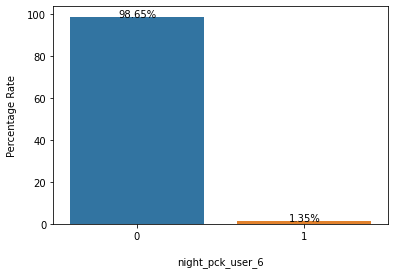

In [652]:
# Univariate Analysis on Ordered categorical variables vs Percentage Rate:
            # night_pck_user_6

series = round(((telecom['night_pck_user_6'].value_counts(dropna = False))/(len(telecom['night_pck_user_6'])) * 100), 2)
ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel('night_pck_user_6', labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)
for i in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = i.get_height()
        x_value = i.get_x() + i.get_width() / 2
        label = "{:.2f}%".format(y_value)
        plt.annotate(label,(x_value, y_value),ha = 'center')

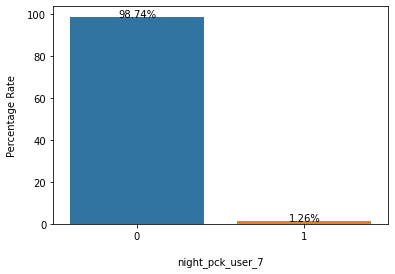

In [653]:
 # night_pck_user_7

series = round(((telecom['night_pck_user_7'].value_counts(dropna = False))/(len(telecom['night_pck_user_7'])) * 100), 2)
ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel('night_pck_user_7', labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)
for i in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = i.get_height()
        x_value = i.get_x() + i.get_width() / 2
        label = "{:.2f}%".format(y_value)
        plt.annotate(label,(x_value, y_value),ha = 'center')

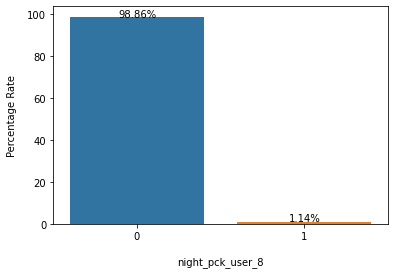

In [654]:
 # night_pck_user_8

series = round(((telecom['night_pck_user_8'].value_counts(dropna = False))/(len(telecom['night_pck_user_8'])) * 100), 2)
ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel('night_pck_user_8', labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)
for i in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = i.get_height()
        x_value = i.get_x() + i.get_width() / 2
        label = "{:.2f}%".format(y_value)
        plt.annotate(label,(x_value, y_value),ha = 'center')

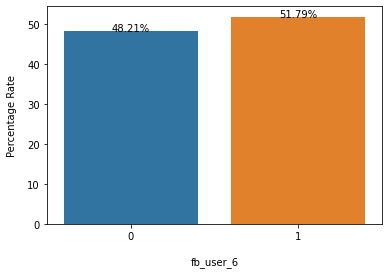

In [655]:
 # fb_user_6

series = round(((telecom['fb_user_6'].value_counts(dropna = False))/(len(telecom['fb_user_6'])) * 100), 2)
ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel('fb_user_6', labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)
for i in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = i.get_height()
        x_value = i.get_x() + i.get_width() / 2
        label = "{:.2f}%".format(y_value)
        plt.annotate(label,(x_value, y_value),ha = 'center')

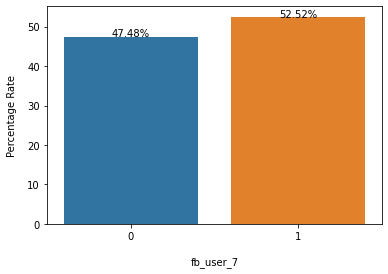

In [656]:
 # fb_user_7

series = round(((telecom['fb_user_7'].value_counts(dropna = False))/(len(telecom['fb_user_7'])) * 100), 2)
ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel('fb_user_7', labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)
for i in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = i.get_height()
        x_value = i.get_x() + i.get_width() / 2
        label = "{:.2f}%".format(y_value)
        plt.annotate(label,(x_value, y_value),ha = 'center')

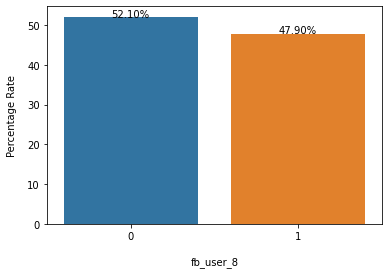

In [657]:
 # fb_user_8

series = round(((telecom['fb_user_8'].value_counts(dropna = False))/(len(telecom['fb_user_8'])) * 100), 2)
ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel('fb_user_8', labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)
for i in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = i.get_height()
        x_value = i.get_x() + i.get_width() / 2
        label = "{:.2f}%".format(y_value)
        plt.annotate(label,(x_value, y_value),ha = 'center')

In [658]:
# night_pck_user variables, it can be inferred that almost 99% of users are not using nightly pack in all the 3 months.

Text(0, 0.5, 'Percentage Rate')

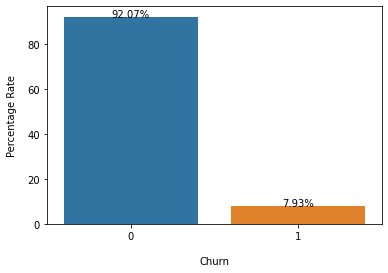

In [659]:
# Analysis on Churn variable:

churn = telecom[telecom["churn"] == 1].shape[0]
nonchurn = telecom[telecom["churn"] == 0].shape[0]

series = round(((telecom["churn"].value_counts(dropna = False))/(len(telecom["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
for i in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = i.get_height()
        x_value = i.get_x() + i.get_width() / 2
        label = "{:.2f}%".format(y_value)
        plt.annotate(label,(x_value, y_value),ha = 'center')
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)


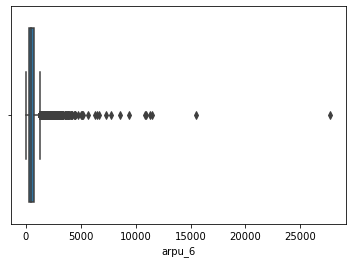

In [660]:
# Quantitative Variables:
# arpu_6
 
sns.boxplot(telecom['arpu_6'])

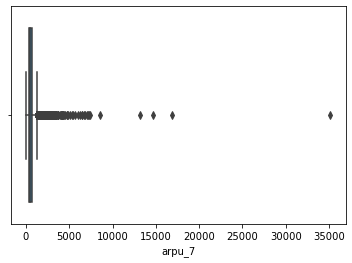

In [661]:
# arpu_7
 
sns.boxplot(telecom['arpu_7'])

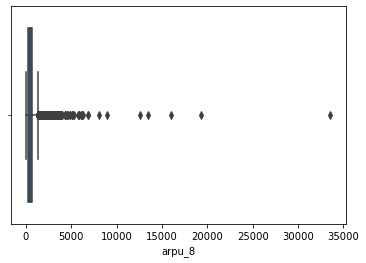

In [662]:
# arpu_8

sns.boxplot(telecom['arpu_8'])

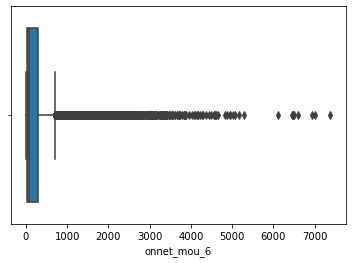

In [663]:
# onnet_mou_6

sns.boxplot(telecom.onnet_mou_6)

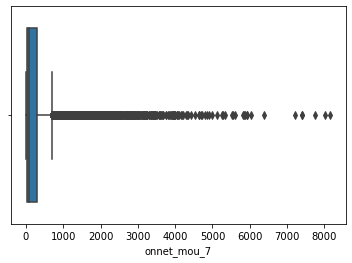

In [664]:
# onnet_mou_7

sns.boxplot(telecom.onnet_mou_7)

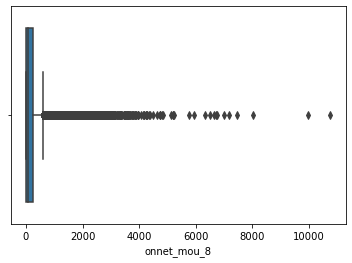

In [665]:
# onnet_mou_8

sns.boxplot(telecom.onnet_mou_8)

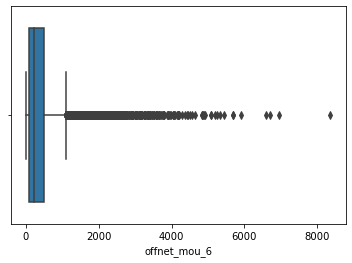

In [666]:
# offnet_mou_6

sns.boxplot(telecom.offnet_mou_6)

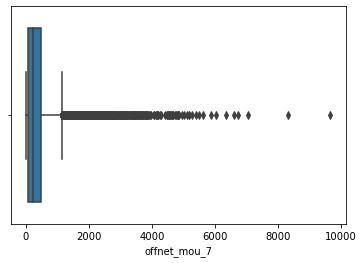

In [667]:
# offnet_mou_7

sns.boxplot(telecom.offnet_mou_7)

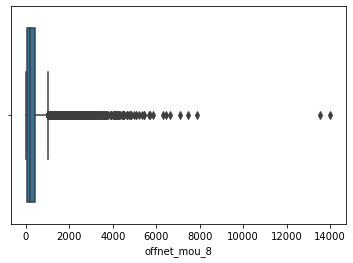

In [668]:
# offnet_mou_8

sns.boxplot(telecom.offnet_mou_8)

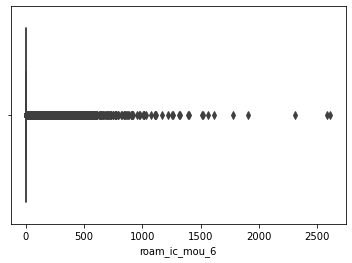

In [669]:
# roam_ic_mou_6

sns.boxplot(telecom.roam_ic_mou_6)

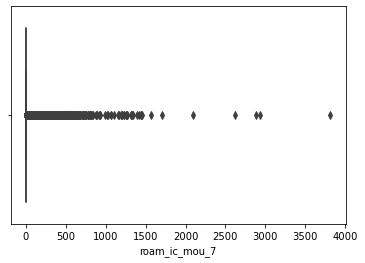

In [670]:
# roam_ic_mou_7

sns.boxplot(telecom.roam_ic_mou_7)

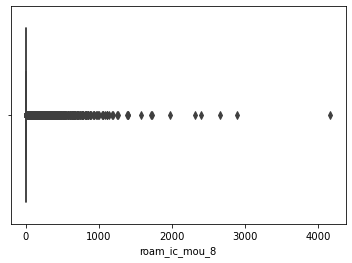

In [671]:
# roam_ic_mou_8

sns.boxplot(telecom.roam_ic_mou_8)

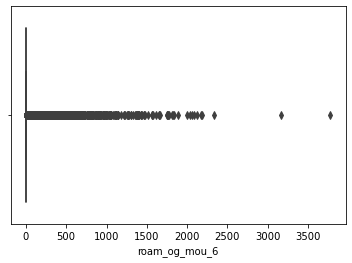

In [672]:
# roam_og_mou_6

sns.boxplot(telecom.roam_og_mou_6)

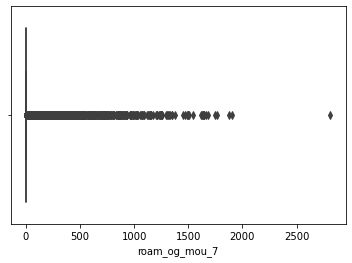

In [673]:
# roam_og_mou_7

sns.boxplot(telecom.roam_og_mou_7)

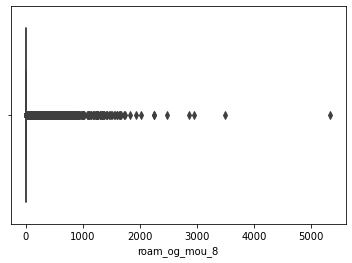

In [674]:
  # roam_og_mou_8

sns.boxplot(telecom.roam_og_mou_8)

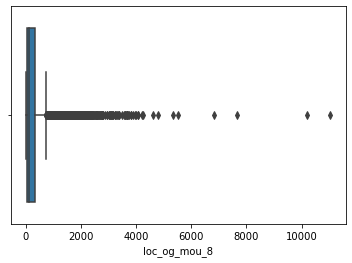

In [675]:
  # loc_og_mou_8

sns.boxplot(telecom.loc_og_mou_8)

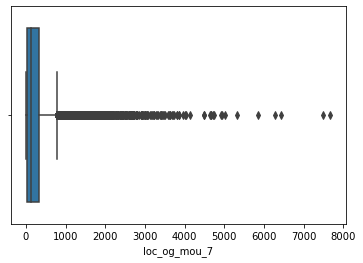

In [676]:
  # loc_og_mou_7

sns.boxplot(telecom.loc_og_mou_7)

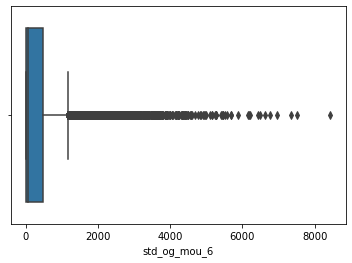

In [677]:
  # std_og_mou_6

sns.boxplot(telecom.std_og_mou_6)

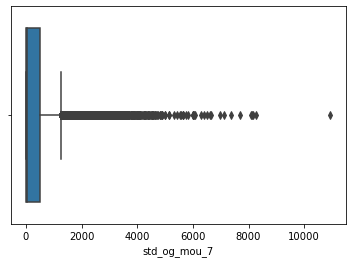

In [678]:
  # std_og_mou_7

sns.boxplot(telecom.std_og_mou_7)

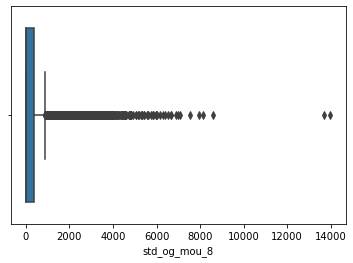

In [679]:
  # std_og_mou_8

sns.boxplot(telecom.std_og_mou_8)

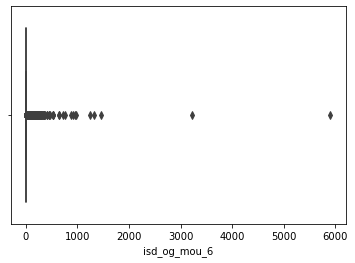

In [680]:
  # isd_og_mou_6

sns.boxplot(telecom.isd_og_mou_6)

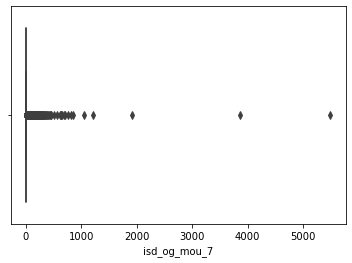

In [681]:
  # isd_og_mou_7

sns.boxplot(telecom.isd_og_mou_7)

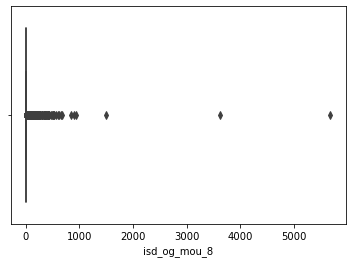

In [682]:
  # isd_og_mou_8

sns.boxplot(telecom.isd_og_mou_8)

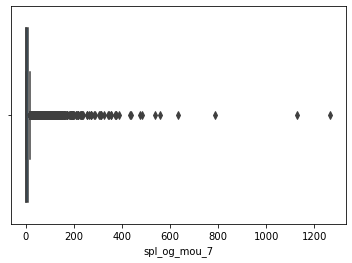

In [683]:
  # spl_og_mou_7

sns.boxplot(telecom.spl_og_mou_7)

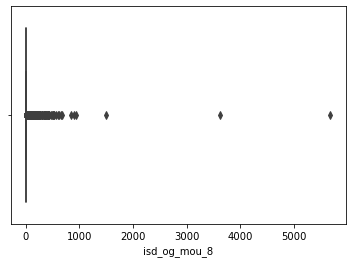

In [684]:
  # isd_og_mou_8

sns.boxplot(telecom.isd_og_mou_8)

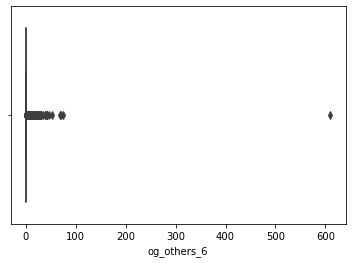

In [685]:
  # og_others_6

sns.boxplot(telecom.og_others_6)

In [686]:
## We found lot of Outliers, we will remove those

### Bivariate Analysis

In [687]:
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,1,1,315,21.03,910.65,122.16,0.0,354.0,207.0,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,720,0.00,0.00,0.00,0.0,0.0,0.0,0
4,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,...,1,1,604,40.45,51.86,0.00,0.0,712.0,540.0,0


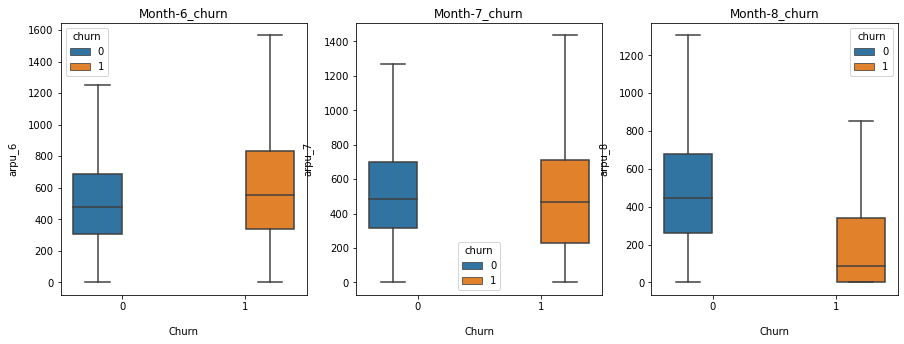

In [688]:
# bivariate analysis churn vs arpu_6, arpu_7, arpu_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.arpu_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("arpu_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.arpu_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("arpu_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.arpu_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("arpu_8", labelpad = 10)
    
plt.show()

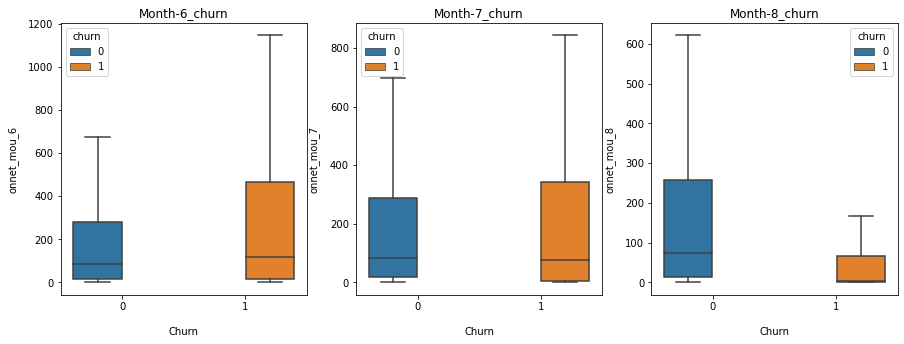

In [689]:
# bivariate analysis churn vs onnet_mou_6, onnet_mou_7, onnet_mou_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.onnet_mou_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("onnet_mou_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.onnet_mou_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("onnet_mou_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.onnet_mou_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("onnet_mou_8", labelpad = 10)
    
plt.show()

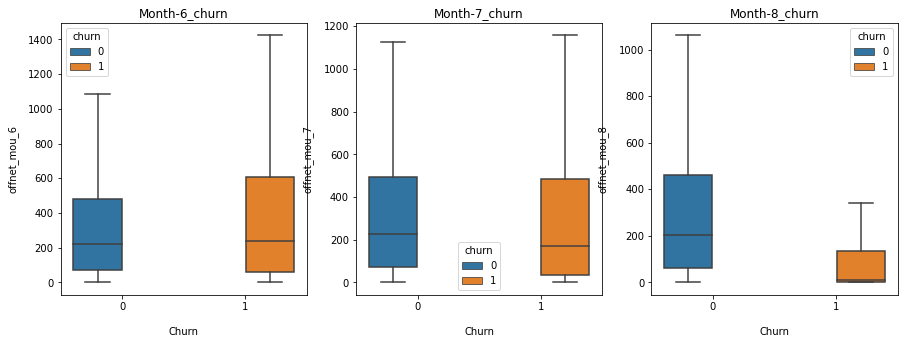

In [690]:
# bivariate analysis churn vs offnet_mou_6, offnet_mou_7, offnet_mou_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.offnet_mou_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("offnet_mou_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.offnet_mou_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("offnet_mou_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.offnet_mou_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("offnet_mou_8", labelpad = 10)
    
plt.show()

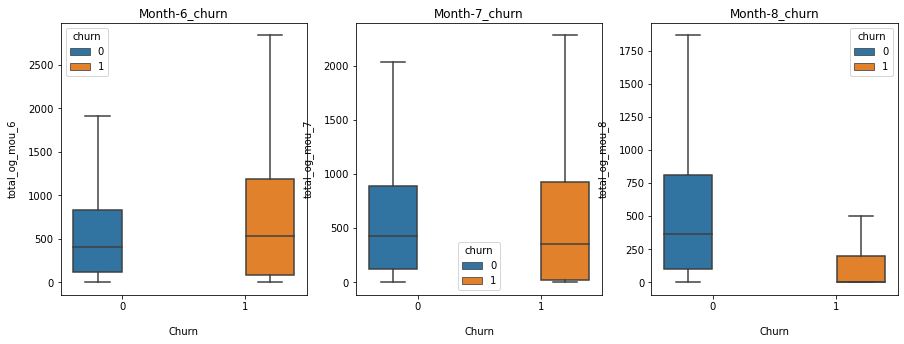

In [691]:
# bivariate analysis churn vs total_og_mou_6, total_og_mou_7, total_og_mou_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.total_og_mou_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_og_mou_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.total_og_mou_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_og_mou_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.total_og_mou_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_og_mou_8", labelpad = 10)
    
plt.show()

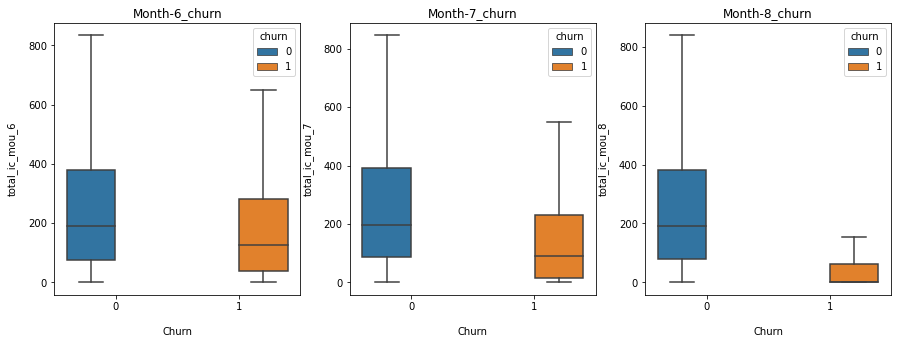

In [692]:
# bivariate analysis churn vs total_ic_mou_6, total_ic_mou_7, total_ic_mou_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.total_ic_mou_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_ic_mou_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.total_ic_mou_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_ic_mou_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.total_ic_mou_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_ic_mou_8", labelpad = 10)
    
plt.show()

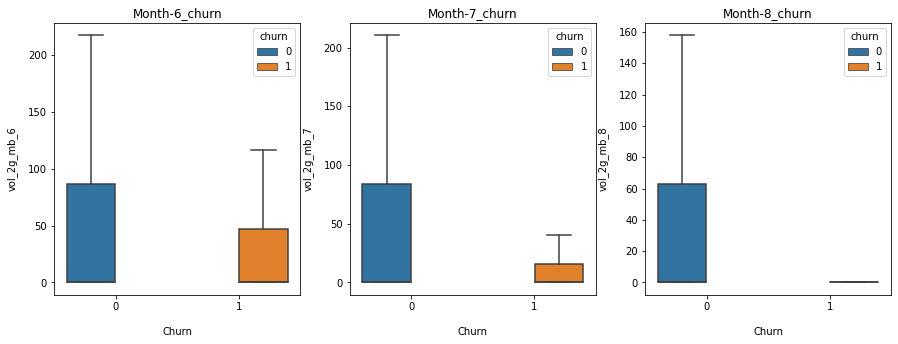

In [693]:
# bivariate analysis churn vs vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.vol_2g_mb_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vol_2g_mb_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.vol_2g_mb_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vol_2g_mb_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.vol_2g_mb_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vol_2g_mb_8", labelpad = 10)
    
plt.show()

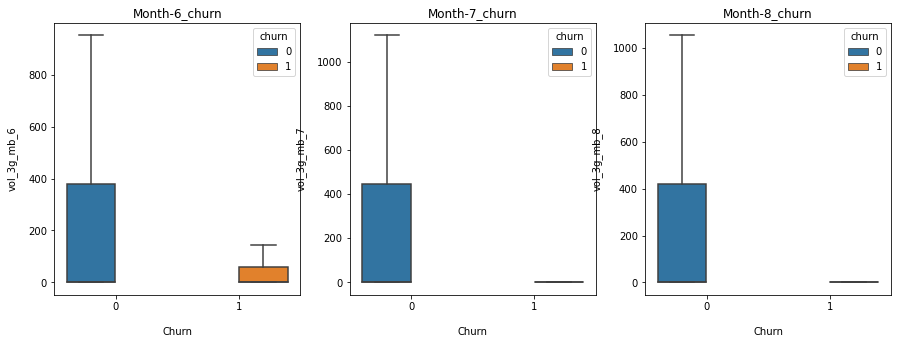

In [694]:
# bivariate analysis churn vs vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.vol_3g_mb_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vol_3g_mb_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.vol_3g_mb_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vol_3g_mb_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.vol_3g_mb_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vol_3g_mb_8", labelpad = 10)
    
plt.show()

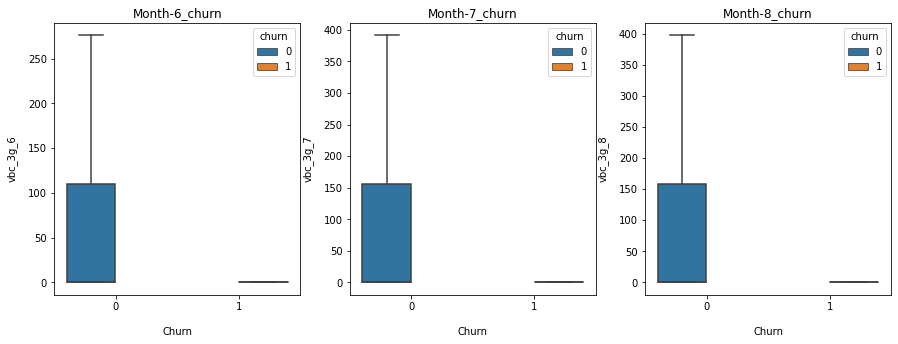

In [695]:
# bivariate analysis churn vs vbc_3g_6, vbc_3g_7, vbc_3g_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.vbc_3g_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vbc_3g_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.vbc_3g_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vbc_3g_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.vbc_3g_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("vbc_3g_8", labelpad = 10)
    
plt.show()

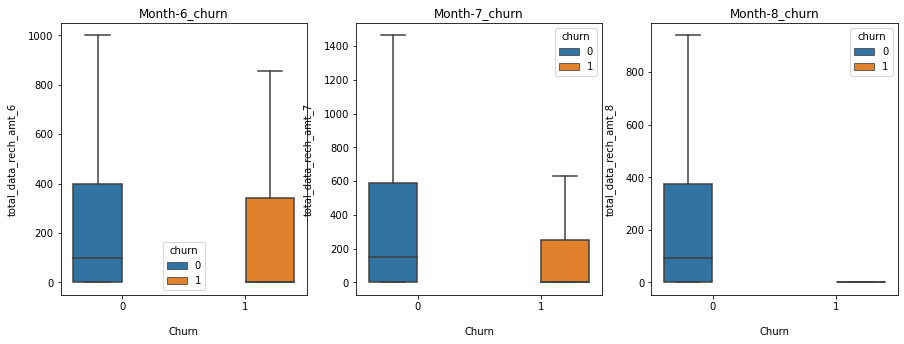

In [696]:
# bivariate analysis churn vs total_data_rech_amt_6, total_data_rech_amt_7, total_data_rech_amt_8:

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

sns.boxplot(x = telecom.churn, y = telecom.total_data_rech_amt_6, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-6_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_data_rech_amt_6", labelpad = 10)


plt.subplot(1, 3, 2)
sns.boxplot(x = telecom.churn, y = telecom.total_data_rech_amt_7, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-7_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_data_rech_amt_7", labelpad = 10)


plt.subplot(1, 3, 3)
sns.boxplot(x = telecom.churn, y = telecom.total_data_rech_amt_8, hue = "churn", data = telecom, showfliers = False)
plt.title("Month-8_churn")
plt.xlabel('Churn', labelpad = 15)
plt.ylabel("total_data_rech_amt_8", labelpad = 10)
    
plt.show()

There is huge drop in 8th month for churned customers

In [697]:
# correlation:

telecom.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
arpu_6,1.000000,0.682003,0.619778,0.343885,0.218888,0.190011,0.515151,0.344861,0.293097,0.126446,...,-0.198300,-0.141476,0.041807,0.059760,0.055983,0.112693,0.089954,-0.023367,0.003365,0.067199
arpu_7,0.682003,1.000000,0.767143,0.212713,0.321003,0.270779,0.355968,0.492669,0.397986,0.092642,...,-0.120627,-0.105054,0.030530,0.083410,0.101979,0.055333,-0.012701,0.091467,0.031556,-0.009176
arpu_8,0.619778,0.767143,1.000000,0.150736,0.232295,0.345283,0.279095,0.376009,0.523837,0.088353,...,-0.103201,0.006007,0.071158,0.147181,0.085783,0.074671,-0.002828,0.028811,0.130190,-0.156370
onnet_mou_6,0.343885,0.212713,0.150736,1.000000,0.751896,0.621407,0.088235,0.036756,0.033265,0.024091,...,-0.280500,-0.237539,-0.044659,-0.105456,-0.111882,-0.101619,-0.098761,-0.103078,-0.076547,0.072536
onnet_mou_7,0.218888,0.321003,0.232295,0.751896,1.000000,0.806452,0.052263,0.081527,0.073065,0.038215,...,-0.271858,-0.224463,-0.052596,-0.102797,-0.108569,-0.107797,-0.104092,-0.099973,-0.073818,0.018319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vbc_3g_6,0.112693,0.055333,0.074671,-0.101619,-0.107797,-0.084429,-0.085805,-0.099998,-0.072961,0.011297,...,0.268806,0.261153,0.016646,0.580045,0.669015,1.000000,0.269553,0.202498,0.159504,-0.030799
total_data_rech_amt_6,0.089954,-0.012701,-0.002828,-0.098761,-0.104092,-0.089457,-0.110227,-0.119530,-0.097821,-0.027255,...,0.239054,0.231764,-0.057114,0.167238,0.198266,0.269553,1.000000,0.465574,0.394341,-0.011590
total_data_rech_amt_7,-0.023367,0.091467,0.028811,-0.103078,-0.099973,-0.076219,-0.131420,-0.122544,-0.099903,-0.023489,...,0.324453,0.283648,-0.057897,0.225157,0.285414,0.202498,0.465574,1.000000,0.523508,-0.036976
total_data_rech_amt_8,0.003365,0.031556,0.130190,-0.076547,-0.073818,-0.055305,-0.089550,-0.088084,-0.050602,-0.016832,...,0.232146,0.286114,-0.041141,0.236967,0.172611,0.159504,0.394341,0.523508,1.000000,-0.068447


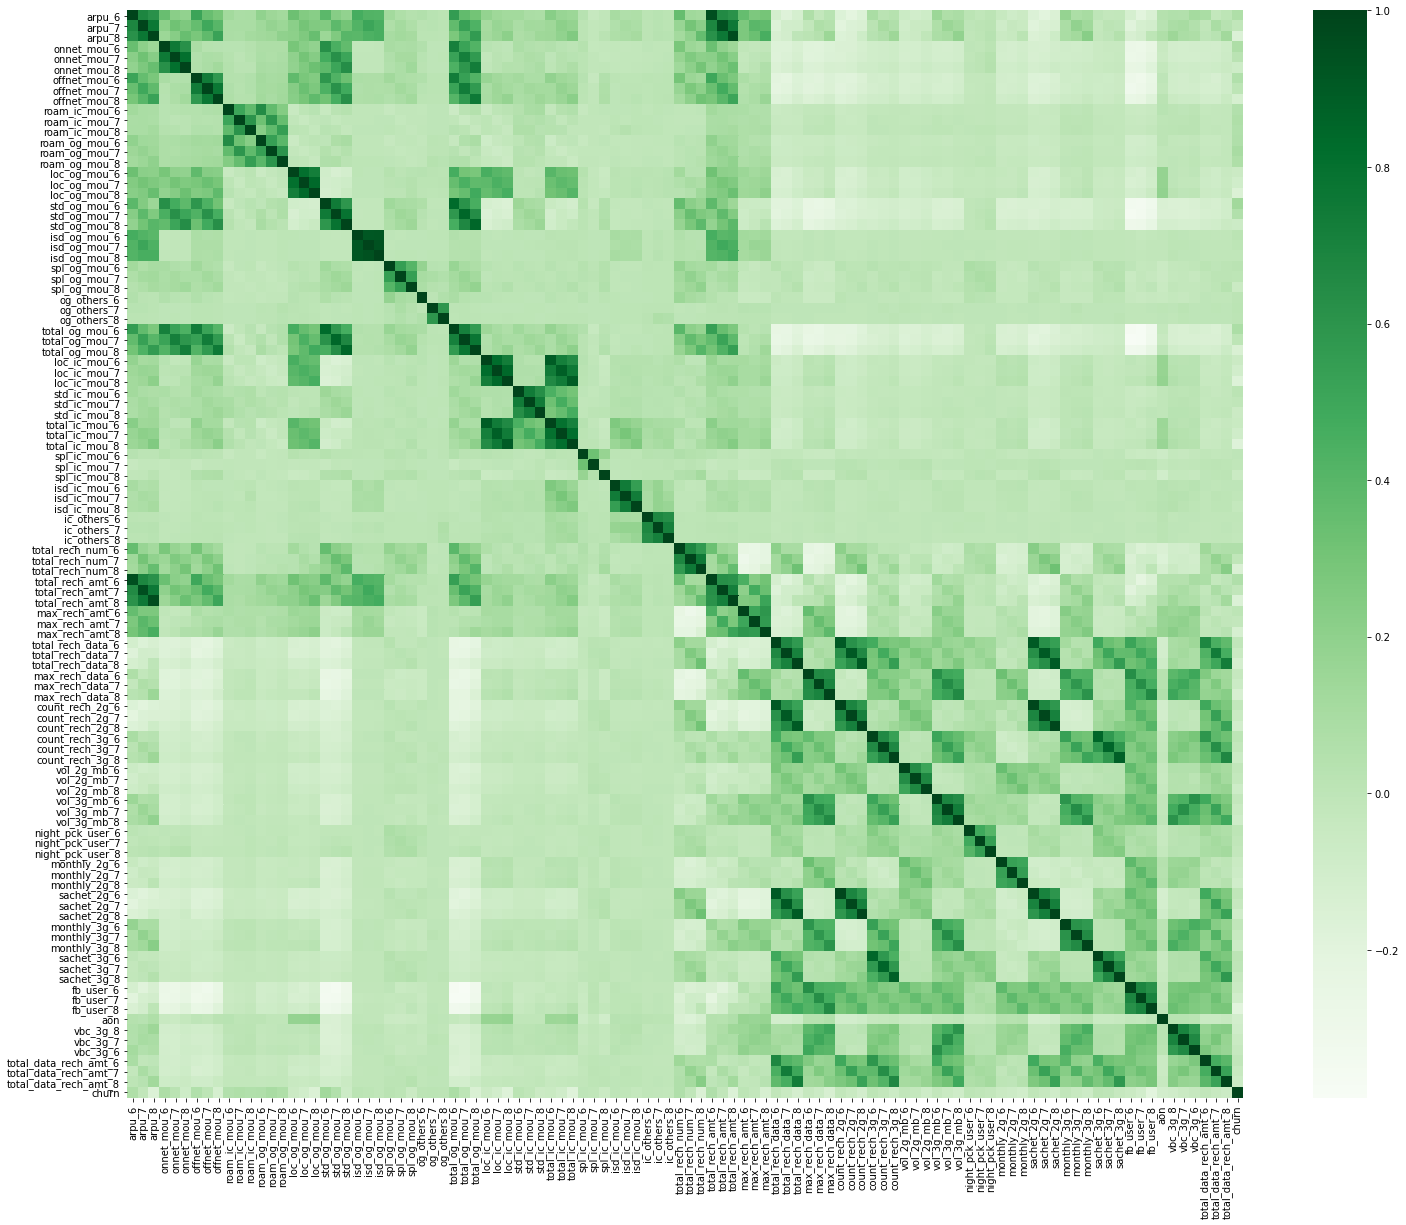

In [698]:
plt.figure(figsize = (25, 20))

sns.heatmap(telecom.corr(), cmap = 'Greens')

plt.show()

We can see some high correlated features.

We drop those features using PCA

## Understanding Customer Behaviour During Churn  

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :  

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual. 


The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)  


The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase. 
 
In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase. 

In [699]:
# Custom Function to get new good phase columns and drop the original columns 

def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8] - df[good_phase_col]
    
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    
    return df

In [700]:
# Good and Action Phase Variables

telecom = derive_good_action_phase(telecom, "arpu")

telecom = derive_good_action_phase(telecom, "onnet_mou")

telecom = derive_good_action_phase(telecom, "offnet_mou")

telecom = derive_good_action_phase(telecom, "roam_ic_mou")

telecom = derive_good_action_phase(telecom, "roam_og_mou")

telecom = derive_good_action_phase(telecom, "loc_og_mou")

telecom = derive_good_action_phase(telecom, "std_og_mou")

telecom = derive_good_action_phase(telecom, "isd_og_mou")

telecom = derive_good_action_phase(telecom, "spl_og_mou")

telecom = derive_good_action_phase(telecom, "og_others")

telecom = derive_good_action_phase(telecom, "total_og_mou")

telecom = derive_good_action_phase(telecom, "loc_ic_mou")

telecom = derive_good_action_phase(telecom, "std_ic_mou")

telecom = derive_good_action_phase(telecom, "spl_ic_mou")

telecom = derive_good_action_phase(telecom, "isd_ic_mou")

telecom = derive_good_action_phase(telecom, "ic_others")

telecom = derive_good_action_phase(telecom, "total_ic_mou")

telecom = derive_good_action_phase(telecom, "total_rech_num")

telecom = derive_good_action_phase(telecom, "total_rech_amt")

telecom = derive_good_action_phase(telecom, "max_rech_amt")

telecom = derive_good_action_phase(telecom, "total_rech_data")

telecom = derive_good_action_phase(telecom, "max_rech_data")

telecom = derive_good_action_phase(telecom, "count_rech_2g")

telecom = derive_good_action_phase(telecom, "count_rech_3g")

telecom = derive_good_action_phase(telecom, "vol_2g_mb")

telecom = derive_good_action_phase(telecom, "vol_3g_mb")

telecom = derive_good_action_phase(telecom, "monthly_2g")

telecom = derive_good_action_phase(telecom, "sachet_2g")

telecom = derive_good_action_phase(telecom, "monthly_3g")

telecom = derive_good_action_phase(telecom, "sachet_3g")

telecom = derive_good_action_phase(telecom, "vbc_3g")

telecom = derive_good_action_phase(telecom, "total_data_rech_amt")

telecom.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,churn,arpu_good_phase,arpu_action_phase,...,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,0,0,0,1,1,1,968,1,206.1005,7.7025,...,0.0,0.0,1.0,0.0,0.0,0.0,50.600,-20.200,252.0,0.0
1,0,0,0,0,0,0,802,1,1209.5150,1961.9650,...,0.0,0.0,0.0,0.0,0.0,0.0,19.060,38.680,0.0,0.0
2,0,0,0,0,1,1,315,0,435.4720,-298.1100,...,0.5,2.5,0.0,0.0,0.0,0.0,516.405,-495.375,177.0,30.0
3,0,0,0,0,0,0,720,0,556.1030,81.6570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0
4,0,0,0,0,1,1,604,0,134.1235,232.8425,...,0.0,0.0,1.0,0.0,0.0,1.0,25.930,14.520,356.0,184.0


In [701]:
telecom.shape


(29824, 72)

### Model Building:

In [702]:
X = telecom.drop('churn', axis = 1)
y = telecom['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 71)
(20876,)
(8948, 71)
(8948,)


###  Data Normalization 

In [703]:
# Normalize the data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

### Handling Imbalanced Dataset

Pre-Processing Techniques:

As a part of pre-processing stage of ML, the following algorithms will be used for handling imbalanced dataset.

1. Undersampling
 - Random undersampling


2. Oversampling
 - Random oversampling: generates new samples by random resampling with replacement of under represented class
 - Synthetic Minority Oversampling (SMOTE)


3. Combined over and under sampling
 - SMOTEENN
 - SMOTETomek


#### Training techniques

Number of learning models themselves do provide some built in support to deal with imbalance data.

1. Sample weighting

In [704]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [705]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38392, 71)
Dimension of y_train_sm Shape: (38392,)


In [706]:
#y_train_sm.reshape(-1)

### Logistic Regression 

In [707]:
# Importing libraries:

import statsmodels.api as sm

In [708]:
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38326
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14964.
Date:                Mon, 16 Aug 2021   Deviance:                       29928.
Time:                        14:46:24   Pearson chi2:                 1.75e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.7892      0.027    -65.763      0.000      -1.843      -1.736
night_pck_user_6                     0.0074      0.016      0.453      0.650      -0.024       0.039
night_pck_user_7                    -0.0097      0.021     -0.460      0.645      -0.051       0.032
night_pck_user_8                     0.0262      0.024      1.074      0.283      -0.022       0.074
fb_user_6                           -0.0110      0.027     -0.402      0.687      -0.064       0.043
fb_user_7                           -0.0033      0.028     -0.120      0.904      -0.058       0.051
fb_user_8                           -0.4169      0.036    -11.484      0.000      -0.488      -0.346
aon                                 -0.3637      0.019    -19.360      0.000      -0.401      -0.327
arpu_good_phase                      0.8265      0.125      6.625      0.000       0.582       1.071
arpu_action_phase                    0.4647      0.062      7.509      0.000       0.343       0.586
onnet_mou_good_phase                -7.9549      1.144     -6.952      0.000     -10.198      -5.712
onnet_mou_action_phase              -2.6771      0.917     -2.920      0.004      -4.474      -0.880
offnet_mou_good_phase               -8.3075      1.192     -6.972      0.000     -10.643      -5.972
offnet_mou_action_phase             -3.0242      1.033     -2.929      0.003      -5.048      -1.000
roam_ic_mou_good_phase               0.0440      0.018      2.451      0.014       0.009       0.079
roam_ic_mou_action_phase            -0.0767      0.016     -4.682      0.000      -0.109      -0.045
roam_og_mou_good_phase               1.8011      0.240      7.506      0.000       1.331       2.271
roam_og_mou_action_phase             0.8666      0.275      3.149      0.002       0.327       1.406
loc_og_mou_good_phase             9800.8849   1413.592      6.933      0.000    7030.296    1.26e+04
loc_og_mou_action_phase           7240.3430    636.332     11.378      0.000    5993.156    8487.530
std_og_mou_good_phase             1.568e+04   2262.028      6.934      0.000    1.13e+04    2.01e+04
std_og_mou_action_phase           1.421e+04   1248.893     11.379      0.000    1.18e+04    1.67e+04
isd_og_mou_good_phase             1415.4365    204.200      6.932      0.000    1015.212    1815.661
isd_og_mou_action_phase            480.6559     42.256     11.375      0.000     397.836     563.476
spl_og_mou_good_phase              476.6214     68.772      6.930      0.000     341.831     611.412
spl_og_mou_action_phase            581.6177     51.127     11.376      0.000     481.410     681.826
og_others_good_phase                73.8941     10.668      6.927      0.000      52.985      94.803
og_others_action_phase             127.2464     11.18

### Logistic Regression using Feature Selection (RFE method)

In [709]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [710]:
rfe.support_

array([False, False, False, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [711]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['fb_user_8', 'aon', 'arpu_good_phase', 'onnet_mou_good_phase',
       'offnet_mou_good_phase', 'roam_og_mou_good_phase',
       'loc_og_mou_good_phase', 'std_og_mou_good_phase',
       'loc_ic_mou_good_phase', 'loc_ic_mou_action_phase',
       'std_ic_mou_action_phase', 'spl_ic_mou_good_phase',
       'spl_ic_mou_action_phase', 'isd_ic_mou_action_phase',
       'total_ic_mou_good_phase', 'total_ic_mou_action_phase',
       'total_rech_num_good_phase', 'total_rech_num_action_phase',
       'total_rech_amt_good_phase', 'total_rech_amt_action_phase'],
      dtype='object')


In [712]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('night_pck_user_6', False, 51),
 ('night_pck_user_7', False, 50),
 ('night_pck_user_8', False, 46),
 ('fb_user_6', False, 52),
 ('fb_user_7', False, 47),
 ('fb_user_8', True, 1),
 ('aon', True, 1),
 ('arpu_good_phase', True, 1),
 ('arpu_action_phase', False, 11),
 ('onnet_mou_good_phase', True, 1),
 ('onnet_mou_action_phase', False, 3),
 ('offnet_mou_good_phase', True, 1),
 ('offnet_mou_action_phase', False, 2),
 ('roam_ic_mou_good_phase', False, 38),
 ('roam_ic_mou_action_phase', False, 29),
 ('roam_og_mou_good_phase', True, 1),
 ('roam_og_mou_action_phase', False, 5),
 ('loc_og_mou_good_phase', True, 1),
 ('loc_og_mou_action_phase', False, 24),
 ('std_og_mou_good_phase', True, 1),
 ('std_og_mou_action_phase', False, 4),
 ('isd_og_mou_good_phase', False, 26),
 ('isd_og_mou_action_phase', False, 28),
 ('spl_og_mou_good_phase', False, 17),
 ('spl_og_mou_action_phase', False, 18),
 ('og_others_good_phase', False, 45),
 ('og_others_action_phase', False, 39),
 ('total_og_mou_good_phase',

In [713]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38371
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15858.
Date:                Mon, 16 Aug 2021   Deviance:                       31717.
Time:                        14:47:14   Pearson chi2:                 6.15e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.7008      0.026    -65.465      0.000      -1.752      -1.650
fb_user_8                      -0.7182      0.017    -41.700      0.000      -0.752      -0.684
aon                            -0.4063      0.018    -22.672      0.000      -0.441      -0.371
arpu_good_phase                 0.4304      0.082      5.253      0.000       0.270       0.591
onnet_mou_good_phase           -1.8723      0.373     -5.017      0.000      -2.604      -1.141
offnet_mou_good_phase          -1.9646      0.389     -5.053      0.000      -2.727      -1.203
roam_og_mou_good_phase          0.5647      0.077      7.328      0.000       0.414       0.716
loc_og_mou_good_phase           1.2598      0.307      4.105      0.000       0.658       1.861
std_og_mou_good_phase           2.4362      0.489      4.980      0.000       1.477       3.395
loc_ic_mou_good_phase          -1.1113      0.085    -13.131      0.000      -1.277      -0.945
loc_ic_mou_action_phase        -2.8941      0.443     -6.539      0.000      -3.762      -2.027
std_ic_mou_action_phase        -1.1030      0.246     -4.478      0.000      -1.586      -0.620
spl_ic_mou_good_phase          -0.9245      0.057    -16.244      0.000      -1.036      -0.813
spl_ic_mou_action_phase        -1.0147      0.059    -17.304      0.000      -1.130      -0.900
isd_ic_mou_action_phase        -0.5921      0.151     -3.929      0.000      -0.888      -0.297
total_ic_mou_good_phase        -0.6793      0.074     -9.194      0.000      -0.824      -0.534
total_ic_mou_action_phase       1.6730      0.539      3.102      0.002       0.616       2.730
total_rech_num_good_phase      -0.3661      0.023    -15.887      0.000      -0.411      -0.321
total_rech_num_action_phase    -0.4404      0.025    -17.877      0.000      -0.489      -0.392
total_rech_amt_good_phase      -0.5104      0.085     -6.020      0.000      -0.677      -0.344
total_rech_amt_action_phase    -0.4610      0.025    -18.680      0.000      -0.509      -0.413
===============================================================================================
"""

In [714]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.46664604, 0.29797089, 0.18317128, 0.08795842, 0.11291021,
       0.06421305, 0.1309522 , 0.99898113, 0.11888238, 0.14187569])

### Creating a dataframe with the actual churn flag and the predicted probabilities


In [715]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.466646
1,0,0.297971
2,0,0.183171
3,0,0.087958
4,0,0.112910


### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [716]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.466646,0
1,0,0.297971,0
2,0,0.183171,0
3,0,0.087958,0
4,0,0.112910,0


In [717]:
from sklearn import metrics

# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)


[[15710  3486]
 [ 3352 15844]]


In [718]:
# Checking the overall accuracy.

print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.821889977078558


In [719]:
# Checking for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,total_ic_mou_action_phase,1008.61
9,loc_ic_mou_action_phase,665.81
7,std_og_mou_good_phase,308.05
4,offnet_mou_good_phase,185.59
10,std_ic_mou_action_phase,184.72
3,onnet_mou_good_phase,169.46
6,loc_og_mou_good_phase,79.96
13,isd_ic_mou_action_phase,44.03
18,total_rech_amt_good_phase,24.76
2,arpu_good_phase,24.75


In [720]:
# TP, TN, FP, FN

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [721]:
# LLet us calculate sensitivity 
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Let us Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# Let us calculate positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Let us calculate Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8253802875599083
Specificity =  0.8183996665972078
False Positive Rate =  0.18160033340279225
Precision =  0.8196585618210036
True Negative Prediction Rate =  0.8241527646626797


### Plotting the ROC Curve

In [722]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [723]:
# Defining the variables to plot the curve

fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )


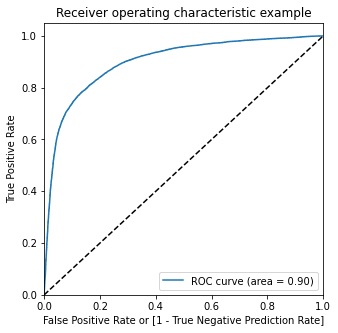

In [724]:
# Plotting the curve for the obtained metrics

draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [725]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
    
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.466646,0,1,1,1,1,1,0,0,0,0,0
1,0,0.297971,0,1,1,1,0,0,0,0,0,0,0
2,0,0.183171,0,1,1,0,0,0,0,0,0,0,0
3,0,0.087958,0,1,0,0,0,0,0,0,0,0,0
4,0,0.112910,0,1,1,0,0,0,0,0,0,0,0


In [726]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.672901     0.973380     0.372421
0.2          0.2  0.742394     0.953584     0.531204
0.3          0.3  0.785424     0.923682     0.647166
0.4          0.4  0.812018     0.883986     0.740050
0.5          0.5  0.821890     0.825380     0.818400
0.6          0.6  0.823427     0.773859     0.872994
0.7          0.7  0.814857     0.713534     0.916180
0.8          0.8  0.782637     0.612055     0.953219
0.9          0.9  0.624635     0.262190     0.987081


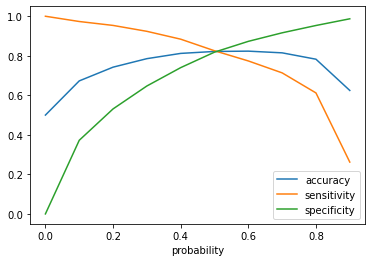

In [727]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])

plt.show()

#### Initially we selected the optimm point of classification as 0.5.

#### From the above graph, we can see the optimum cutoff is  0.5 to 0.6

In [728]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.57 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,0.466646,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0.297971,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.183171,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.087958,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.112910,0,1,1,0,0,0,0,0,0,0,0,0


In [729]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8235048968535111


0.57 is best optimal threshold

### Precision and Recall

In [730]:
from sklearn.metrics import precision_recall_curve

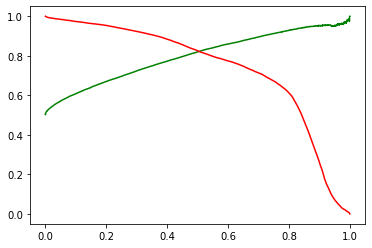

In [731]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [732]:
X_test=X_test[rfe_columns]
X_test.head()

,fb_user_8,aon,arpu_good_phase,onnet_mou_good_phase,offnet_mou_good_phase,roam_og_mou_good_phase,loc_og_mou_good_phase,std_og_mou_good_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase
18395,-0.96008,-0.057294,-0.223150,-0.401199,-0.503080,-0.252225,-0.111491,-0.599110,-0.432341,0.319662,-0.003133,0.951631,-0.990980,-0.205154,-0.476216,0.217868,-0.495819,-0.104503,-0.255019,-0.111264
16876,-0.96008,-0.913886,0.037801,0.110140,-0.361011,-0.242138,0.721823,-0.605607,1.066698,-0.405789,0.013035,-0.243551,0.076855,0.010453,0.745035,-0.320946,0.082537,-0.841233,0.120808,-0.484506
11117,1.04158,0.142229,-0.912791,-0.584609,-0.674641,-0.252225,-0.567665,-0.569668,-0.718157,0.097394,0.050829,-0.243551,0.076855,0.011126,-0.766139,0.105761,-0.495819,1.810995,-0.917493,0.516731
13350,1.04158,0.514115,0.109243,-0.352367,0.512373,-0.252225,0.972873,-0.493155,0.551672,-0.213200,0.013680,-0.243551,0.076855,0.067971,0.433965,-0.148277,-0.784996,0.116516,-0.123070,0.752525
13749,-0.96008,0.662451,0.209519,-0.319615,0.050073,-0.252225,-0.146375,-0.081172,0.250773,0.048842,-1.216838,-0.243551,0.076855,0.011126,0.469598,-0.504287,-0.264476,-0.399195,0.257307,-0.299663


In [733]:
# Adding constant to the test model.

X_test_SM = sm.add_constant(X_test)

In [734]:
y_test_pred = res.predict(X_test_SM)

print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 18395    0.454135
16876    0.222889
11117    0.140301
13350    0.027363
13749    0.262057
3901     0.142555
11672    0.004155
26123    0.800330
26937    0.170523
18545    0.532933
dtype: float64


In [735]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
18395,0.454135
16876,0.222889
11117,0.140301
13350,0.027363
13749,0.262057


In [736]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [737]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
18395,0
16876,0
11117,0
13350,0
13749,0


In [738]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
18395,0,0.454135
16876,0,0.222889
11117,0,0.140301
13350,0,0.027363
13749,0,0.262057


In [739]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.57 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
18395,0,0.454135,0
16876,0,0.222889,0
11117,0,0.140301,0
13350,0,0.027363,0
13749,0,0.262057,0


In [740]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8558337058560572

In [741]:
## Metrics Evaluation

# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)

print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[7125 1139]
 [ 151  533]]


In [742]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [743]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7792397660818714
Specificity =  0.8621732817037754
False Positive Rate =  0.1378267182962246
Precision =  0.3187799043062201
True Negative Prediction Rate =  0.9792468389224849


In [744]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")

The accuracy of the predicted model is:  86.0 %
The sensitivity of the predicted model is:  78.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



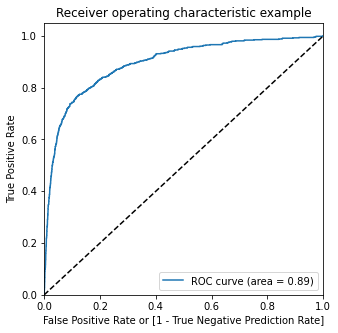

In [745]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

In [746]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score

scores2=[]
model_f1_score = f1_score(y_pred_final.churn, y_pred_final.test_churn_pred)
model_precision_score = precision_score(y_pred_final.churn, y_pred_final.test_churn_pred)
model_recall_score = recall_score(y_pred_final.churn, y_pred_final.test_churn_pred)
model_accuracy_score = accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)
model_auc_roc = auc(fpr, tpr)
    
scores2.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
                   ))

In [747]:
sampling_results = pd.DataFrame(scores2, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,auc_roc,confusion_matrix
0,0.452462,0.31878,0.77924,0.855834,0.8948,"[[7125, 1139], [151, 533]]"


We see an overall AUC score of 0.90 looks like we did a decent job.
But we did spend a lot of effort on the features and their selection.

### Logistic regression with PCA`

In [748]:
X = telecom.drop('churn', axis = 1)
y = telecom['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 71)
(20876,)
(8948, 71)
(8948,)


In [749]:
# Normalize the data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [750]:
# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train_sm Shape: (38392, 71)
Dimension of y_train_sm Shape: (38392,)


,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,...,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,-0.932689,-0.044467,-0.270379,1.794439,...,-0.472268,0.035727,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,-0.399465,0.010587
1,-0.115962,-0.109647,9.474451,0.963864,0.948626,1.04158,-0.643328,-1.009713,0.283778,-0.595405,...,0.996635,0.839729,-0.388972,0.023805,0.789810,0.014136,-0.427158,0.325714,-0.023567,0.222703
2,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,-0.036402,1.318706,-0.573778,3.026790,...,-0.472268,0.035727,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,-0.399465,0.010587
3,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,0.141184,-0.458205,0.926547,-0.528173,...,1.836008,-0.232273,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,0.176283,-0.300010
4,-0.115962,-0.109647,-0.105547,0.963864,0.948626,1.04158,0.463973,-0.082175,-0.009619,-0.561494,...,-0.052581,0.571728,-0.388972,0.023805,0.789810,1.105088,0.402419,0.944935,0.099544,1.212135


In [751]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [752]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38392, 71)
Dimension of X_test_pca:  (8948, 71)


Components from the PCA

In [753]:
#Viewing the PCA components
pca.components_

array([[ 1.87640393e-02,  1.85892700e-02,  1.58160553e-02, ...,
        -2.38331028e-04,  8.92491985e-02, -9.98759366e-03],
       [-7.56686783e-02, -6.55976494e-02, -2.10770569e-02, ...,
         9.97085253e-02, -1.91989532e-01,  1.78479228e-01],
       [-2.98026559e-02, -2.45385270e-02, -9.68120344e-03, ...,
        -6.62327129e-02, -6.46715572e-03,  1.06893887e-02],
       ...,
       [-0.00000000e+00, -1.24418665e-16,  1.15224661e-16, ...,
         7.51714602e-17,  6.18686190e-17,  8.26998805e-17],
       [ 0.00000000e+00, -4.73428464e-17,  4.46196670e-17, ...,
         1.22298509e-16,  1.17629368e-16,  5.86785847e-17],
       [ 0.00000000e+00, -6.69847471e-17,  1.87213912e-16, ...,
        -8.35608170e-17,  5.85349530e-17,  6.22610210e-17]])

Looking at the explained variance ratio for each component

In [754]:
pca.explained_variance_ratio_

array([1.40032991e-01, 8.78058879e-02, 6.57654830e-02, 5.73957193e-02,
       4.87263081e-02, 4.40782343e-02, 4.08882834e-02, 3.63278132e-02,
       3.02946001e-02, 2.54194787e-02, 2.45506162e-02, 2.22611386e-02,
       2.16354108e-02, 2.01289404e-02, 1.84703641e-02, 1.80624590e-02,
       1.68867935e-02, 1.63131534e-02, 1.59954583e-02, 1.48875952e-02,
       1.32784421e-02, 1.30586786e-02, 1.25932274e-02, 1.20811953e-02,
       1.17553951e-02, 1.13217365e-02, 1.08307566e-02, 1.03363457e-02,
       9.97336416e-03, 9.74074851e-03, 8.88587930e-03, 8.32606919e-03,
       7.82662541e-03, 7.30283359e-03, 6.56791317e-03, 6.45954576e-03,
       5.68689764e-03, 5.30226817e-03, 5.09080547e-03, 4.95645090e-03,
       4.61931892e-03, 4.50367050e-03, 4.43816566e-03, 4.16526073e-03,
       4.01169755e-03, 3.84353507e-03, 3.74220293e-03, 3.57019841e-03,
       3.42148306e-03, 3.20539269e-03, 2.91920623e-03, 2.15598689e-03,
       1.78595292e-03, 1.54073213e-03, 1.32726280e-03, 1.21688878e-03,
      

In [755]:
# Logistic regression with PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (8948, 1)


Making a scree plot for the explained varianc

In [756]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

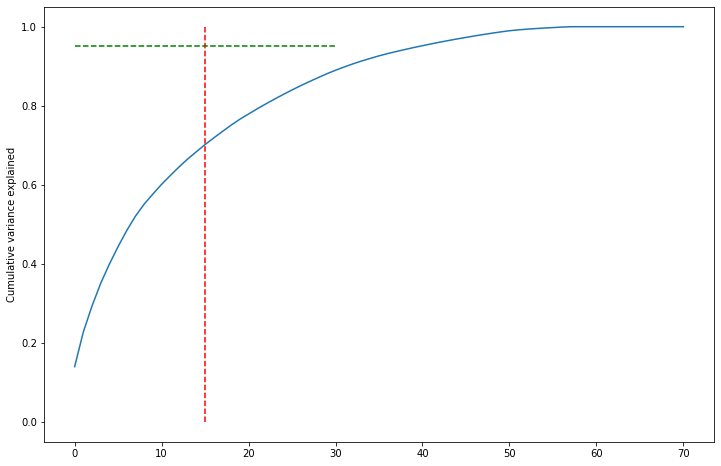

In [757]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [758]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6772 1492]
 [ 123  561]] 

Accuracy of the logistic regression model with PCA:  0.8195127402771569


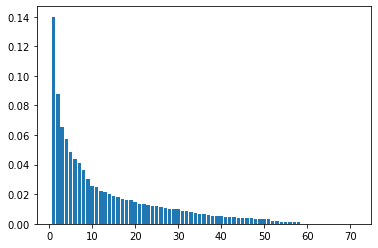

In [759]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

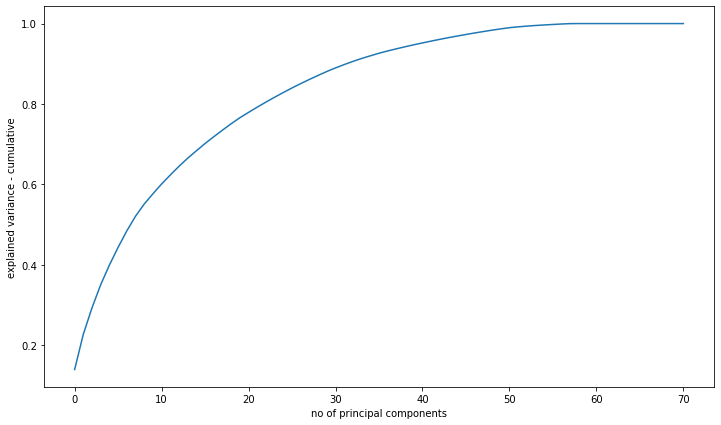

In [760]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

Perform PCA with 16 components

In [761]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([14. , 22.8, 29.4, 35.1, 40. , 44.4, 48.5, 52.1, 55.1, 57.6, 60.1,
       62.3, 64.5, 66.5, 68.3, 70.1, 71.8, 73.4, 75. , 76.5, 77.8, 79.1,
       80.4, 81.6, 82.8, 83.9, 85. , 86. , 87. , 88. , 88.9, 89.7, 90.5,
       91.2, 91.9, 92.5, 93.1, 93.6, 94.1, 94.6, 95.1, 95.6, 96. , 96.4,
       96.8, 97.2, 97.6, 98. , 98.3, 98.6, 98.9, 99.1, 99.3, 99.5, 99.6,
       99.7, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9])

Perform PCA with 16 components

In [762]:
from sklearn.decomposition import IncrementalPCA

In [763]:
pca_final = IncrementalPCA(n_components=16)

In [764]:
df_train_pca = pca_final.fit_transform(X_train_sm)

In [765]:
df_train_pca.shape

(38392, 16)

In [766]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [767]:
corrmat.shape

(16, 16)

Plotting the heatmap of the corr matrix

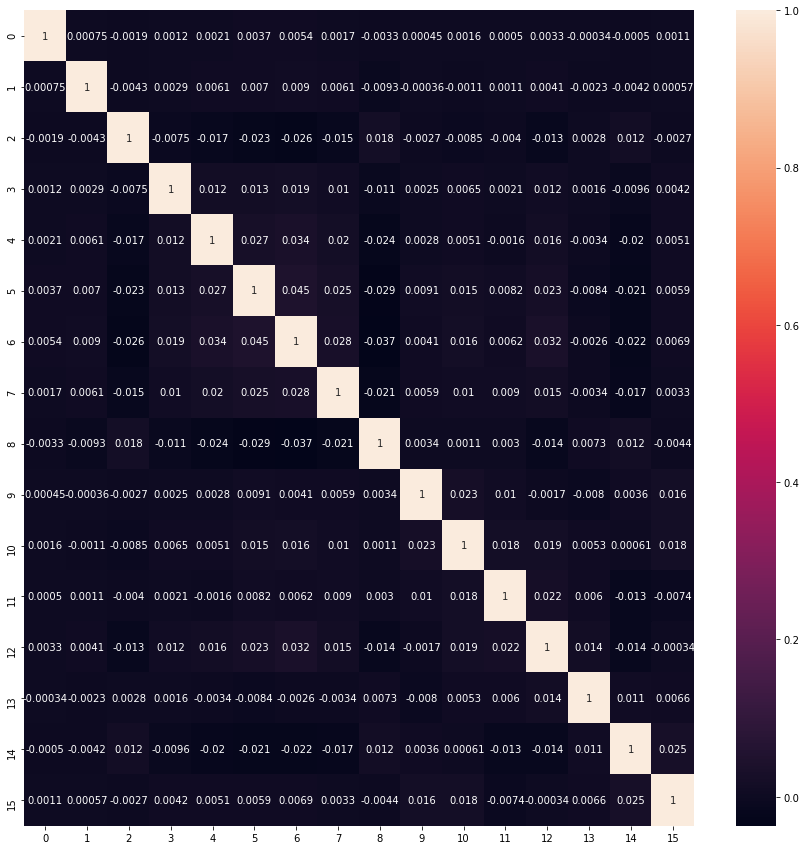

In [768]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [769]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8948, 16)

Applying logistic regression on the data on our Principal components

In [770]:
from sklearn.linear_model import LogisticRegression

In [771]:
learner_pca = LogisticRegression()

In [772]:
model_pca = learner_pca.fit(df_train_pca, y_train_sm)

Making predictions on the test set

In [773]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [774]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

Making it a little more unsupervised

In [775]:
pca_again = PCA(0.9)

In [776]:
df_train_pca2 = pca_again.fit_transform(X_train_sm)

In [777]:
df_train_pca2.shape

(38392, 33)

Following it up with a logistic regression model

In [778]:
learner_pca2 = LogisticRegression()

In [779]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train_sm)

In [780]:
df_test_pca2 = pca_again.transform(X_test)

In [781]:
df_test_pca2.shape

(8948, 33)

In [782]:
# making the predictions
y_pred_log_pca = model_pca2.predict(df_test_pca2)

# converting the prediction into a dataframe
y_pred_df_log_pca = pd.DataFrame(y_pred_log_pca)
print("Dimension of y_pred_df_15: ", y_pred_df_log_pca.shape)

Dimension of y_pred_df_15:  (8948, 1)


In [783]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [784]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.9'

In [785]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score

scores3=[]
model_f1_score = f1_score(y_test.values.ravel(), y_pred_log_pca)
model_precision_score = precision_score(y_test, y_pred_log_pca)
model_recall_score = recall_score(y_test, y_pred_log_pca)
model_accuracy_score = accuracy_score(y_test, y_pred_log_pca)
model_auc_roc = auc(fpr, tpr)
    
scores3.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   confusion_matrix(y_test, y_pred_log_pca)
                   ))

In [786]:
sampling_results = pd.DataFrame(scores3, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,auc_roc,confusion_matrix
0,0.409524,0.273216,0.817251,0.819848,0.8948,"[[6777, 1487], [125, 559]]"


## Decision Tree - PCA

In [787]:
X = telecom.drop('churn', axis = 1)
y = telecom['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 71)
(20876,)
(8948, 71)
(8948,)


In [788]:
# Normalize the data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [789]:
# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train_sm Shape: (38392, 71)
Dimension of y_train_sm Shape: (38392,)


,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,...,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,-0.932689,-0.044467,-0.270379,1.794439,...,-0.472268,0.035727,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,-0.399465,0.010587
1,-0.115962,-0.109647,9.474451,0.963864,0.948626,1.04158,-0.643328,-1.009713,0.283778,-0.595405,...,0.996635,0.839729,-0.388972,0.023805,0.789810,0.014136,-0.427158,0.325714,-0.023567,0.222703
2,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,-0.036402,1.318706,-0.573778,3.026790,...,-0.472268,0.035727,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,-0.399465,0.010587
3,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,0.141184,-0.458205,0.926547,-0.528173,...,1.836008,-0.232273,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,0.176283,-0.300010
4,-0.115962,-0.109647,-0.105547,0.963864,0.948626,1.04158,0.463973,-0.082175,-0.009619,-0.561494,...,-0.052581,0.571728,-0.388972,0.023805,0.789810,1.105088,0.402419,0.944935,0.099544,1.212135


In [790]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [791]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38392, 71)
Dimension of X_test_pca:  (8948, 71)


In [792]:
#Viewing the PCA components
pca.components_

array([[ 1.87640393e-02,  1.85892700e-02,  1.58160553e-02, ...,
        -2.38331028e-04,  8.92491985e-02, -9.98759366e-03],
       [-7.56686783e-02, -6.55976494e-02, -2.10770569e-02, ...,
         9.97085253e-02, -1.91989532e-01,  1.78479228e-01],
       [-2.98026559e-02, -2.45385270e-02, -9.68120344e-03, ...,
        -6.62327129e-02, -6.46715572e-03,  1.06893887e-02],
       ...,
       [-0.00000000e+00, -1.24418665e-16,  1.15224661e-16, ...,
         7.51714602e-17,  6.18686190e-17,  8.26998805e-17],
       [ 0.00000000e+00, -4.73428464e-17,  4.46196670e-17, ...,
         1.22298509e-16,  1.17629368e-16,  5.86785847e-17],
       [ 0.00000000e+00, -6.69847471e-17,  1.87213912e-16, ...,
        -8.35608170e-17,  5.85349530e-17,  6.22610210e-17]])

In [793]:
pca.explained_variance_ratio_

array([1.40032991e-01, 8.78058879e-02, 6.57654830e-02, 5.73957193e-02,
       4.87263081e-02, 4.40782343e-02, 4.08882834e-02, 3.63278132e-02,
       3.02946001e-02, 2.54194787e-02, 2.45506162e-02, 2.22611386e-02,
       2.16354108e-02, 2.01289404e-02, 1.84703641e-02, 1.80624590e-02,
       1.68867935e-02, 1.63131534e-02, 1.59954583e-02, 1.48875952e-02,
       1.32784421e-02, 1.30586786e-02, 1.25932274e-02, 1.20811953e-02,
       1.17553951e-02, 1.13217365e-02, 1.08307566e-02, 1.03363457e-02,
       9.97336416e-03, 9.74074851e-03, 8.88587930e-03, 8.32606919e-03,
       7.82662541e-03, 7.30283359e-03, 6.56791317e-03, 6.45954576e-03,
       5.68689764e-03, 5.30226817e-03, 5.09080547e-03, 4.95645090e-03,
       4.61931892e-03, 4.50367050e-03, 4.43816566e-03, 4.16526073e-03,
       4.01169755e-03, 3.84353507e-03, 3.74220293e-03, 3.57019841e-03,
       3.42148306e-03, 3.20539269e-03, 2.91920623e-03, 2.15598689e-03,
       1.78595292e-03, 1.54073213e-03, 1.32726280e-03, 1.21688878e-03,
      

In [794]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train_sm_pca, y_train_sm)


In [795]:
# making the predictions
y_pred = tree.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (8948, 1)


In [796]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the Decision tree with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[7271  993]
 [ 348  336]] 

Accuracy of the Decision tree with PCA:  0.850134108180599


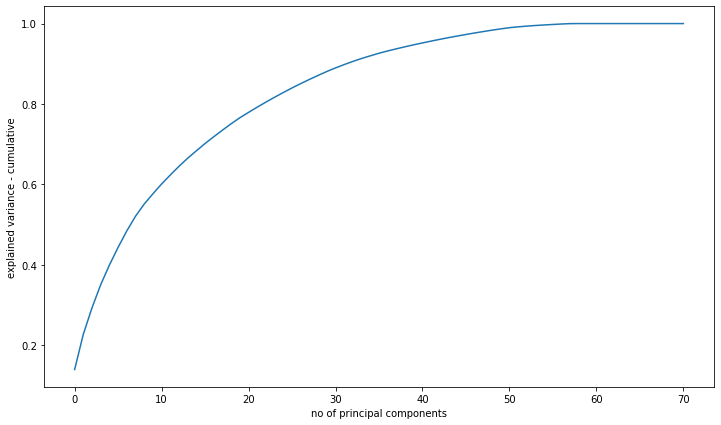

In [797]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [798]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([14. , 22.8, 29.4, 35.1, 40. , 44.4, 48.5, 52.1, 55.1, 57.6, 60.1,
       62.3, 64.5, 66.5, 68.3, 70.1, 71.8, 73.4, 75. , 76.5, 77.8, 79.1,
       80.4, 81.6, 82.8, 83.9, 85. , 86. , 87. , 88. , 88.9, 89.7, 90.5,
       91.2, 91.9, 92.5, 93.1, 93.6, 94.1, 94.6, 95.1, 95.6, 96. , 96.4,
       96.8, 97.2, 97.6, 98. , 98.3, 98.6, 98.9, 99.1, 99.3, 99.5, 99.6,
       99.7, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9])

In [799]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

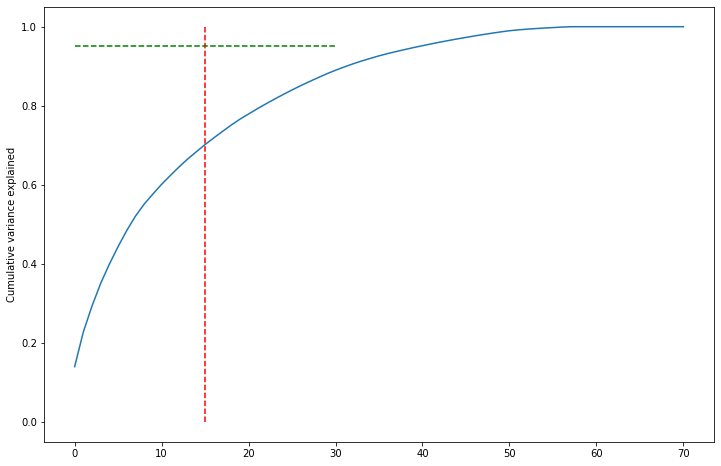

In [800]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [801]:
pca_15 = PCA(n_components=15)

train_pca_15 = pca_15.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_15.shape)

test_pca_15 = pca_15.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_15.shape)

Dimension for Train dataset using PCA:  (38392, 15)
Dimension for Test dataset using PCA:  (8948, 15)


In [802]:

tree_pca_15 = DecisionTreeClassifier(random_state = 100)

tree_pca_15 = tree.fit(train_pca_15, y_train_sm)

# making the predictions
y_pred_15 = tree_pca_15.predict(test_pca_15)

# converting the prediction into a dataframe
y_pred_df_15 = pd.DataFrame(y_pred_15)
print("Dimension of y_pred_df_15: ", y_pred_df_15.shape)

Dimension of y_pred_df_15:  (8948, 1)


In [803]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_15),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the Decision Tree model with PCA: ",accuracy_score(y_test,y_pred_15))

Confusion Matirx for y_test & y_pred
 [[7071 1193]
 [ 315  369]] 

Accuracy of the Decision Tree model with PCA:  0.8314707197139025


In [804]:
from sklearn.metrics import classification_report

In [805]:
print(classification_report(y_test, y_pred_15))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      8264
           1       0.24      0.54      0.33       684

    accuracy                           0.83      8948
   macro avg       0.60      0.70      0.62      8948
weighted avg       0.90      0.83      0.86      8948



In [807]:
scores=[]
model_f1_score = f1_score(y_test.values.ravel(), y_pred_15)
model_precision_score = precision_score(y_test.values.ravel(), y_pred_15)
model_recall_score = recall_score(y_test.values.ravel(), y_pred_15)
model_accuracy_score = accuracy_score(y_test.values.ravel(), y_pred_15)
model_auc_roc = auc(fpr, tpr)
    
scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   confusion_matrix(y_test.values.ravel(), y_pred_15)
                   ))


In [808]:
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,auc_roc,confusion_matrix
0,0.328584,0.236236,0.539474,0.831471,0.8948,"[[7071, 1193], [315, 369]]"


### Random Forest with PCA

In [809]:
X = telecom.drop('churn', axis = 1)
y = telecom['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20876, 71)
(20876,)
(8948, 71)
(8948,)


In [810]:
# Normalize the data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [811]:
# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train_sm Shape: (38392, 71)
Dimension of y_train_sm Shape: (38392,)


,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,...,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,-0.932689,-0.044467,-0.270379,1.794439,...,-0.472268,0.035727,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,-0.399465,0.010587
1,-0.115962,-0.109647,9.474451,0.963864,0.948626,1.04158,-0.643328,-1.009713,0.283778,-0.595405,...,0.996635,0.839729,-0.388972,0.023805,0.789810,0.014136,-0.427158,0.325714,-0.023567,0.222703
2,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,-0.036402,1.318706,-0.573778,3.026790,...,-0.472268,0.035727,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,-0.399465,0.010587
3,-0.115962,-0.109647,-0.105547,-1.037491,-1.054157,-0.96008,0.141184,-0.458205,0.926547,-0.528173,...,1.836008,-0.232273,-0.388972,0.023805,-0.224622,0.014136,-0.427158,-0.003682,0.176283,-0.300010
4,-0.115962,-0.109647,-0.105547,0.963864,0.948626,1.04158,0.463973,-0.082175,-0.009619,-0.561494,...,-0.052581,0.571728,-0.388972,0.023805,0.789810,1.105088,0.402419,0.944935,0.099544,1.212135


In [812]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [813]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38392, 71)
Dimension of X_test_pca:  (8948, 71)


In [814]:
#Viewing the PCA components
pca.components_

array([[ 1.87640393e-02,  1.85892700e-02,  1.58160553e-02, ...,
        -2.38331028e-04,  8.92491985e-02, -9.98759366e-03],
       [-7.56686783e-02, -6.55976494e-02, -2.10770569e-02, ...,
         9.97085253e-02, -1.91989532e-01,  1.78479228e-01],
       [-2.98026559e-02, -2.45385270e-02, -9.68120344e-03, ...,
        -6.62327129e-02, -6.46715572e-03,  1.06893887e-02],
       ...,
       [-0.00000000e+00, -1.24418665e-16,  1.15224661e-16, ...,
         7.51714602e-17,  6.18686190e-17,  8.26998805e-17],
       [ 0.00000000e+00, -4.73428464e-17,  4.46196670e-17, ...,
         1.22298509e-16,  1.17629368e-16,  5.86785847e-17],
       [ 0.00000000e+00, -6.69847471e-17,  1.87213912e-16, ...,
        -8.35608170e-17,  5.85349530e-17,  6.22610210e-17]])

In [815]:
pca.explained_variance_ratio_

array([1.40032991e-01, 8.78058879e-02, 6.57654830e-02, 5.73957193e-02,
       4.87263081e-02, 4.40782343e-02, 4.08882834e-02, 3.63278132e-02,
       3.02946001e-02, 2.54194787e-02, 2.45506162e-02, 2.22611386e-02,
       2.16354108e-02, 2.01289404e-02, 1.84703641e-02, 1.80624590e-02,
       1.68867935e-02, 1.63131534e-02, 1.59954583e-02, 1.48875952e-02,
       1.32784421e-02, 1.30586786e-02, 1.25932274e-02, 1.20811953e-02,
       1.17553951e-02, 1.13217365e-02, 1.08307566e-02, 1.03363457e-02,
       9.97336416e-03, 9.74074851e-03, 8.88587930e-03, 8.32606919e-03,
       7.82662541e-03, 7.30283359e-03, 6.56791317e-03, 6.45954576e-03,
       5.68689764e-03, 5.30226817e-03, 5.09080547e-03, 4.95645090e-03,
       4.61931892e-03, 4.50367050e-03, 4.43816566e-03, 4.16526073e-03,
       4.01169755e-03, 3.84353507e-03, 3.74220293e-03, 3.57019841e-03,
       3.42148306e-03, 3.20539269e-03, 2.91920623e-03, 2.15598689e-03,
       1.78595292e-03, 1.54073213e-03, 1.32726280e-03, 1.21688878e-03,
      

In [816]:
from sklearn.ensemble import RandomForestClassifier

In [817]:
rf = RandomForestClassifier(random_state=42,n_estimators=10,max_depth=3)

In [818]:
rf.fit(X_train_sm_pca,y_train_sm)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [819]:
# making the predictions
y_pred = rf.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (8948, 1)


In [820]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the Random Forest with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6627 1637]
 [ 190  494]] 

Accuracy of the Random Forest with PCA:  0.7958202950379973


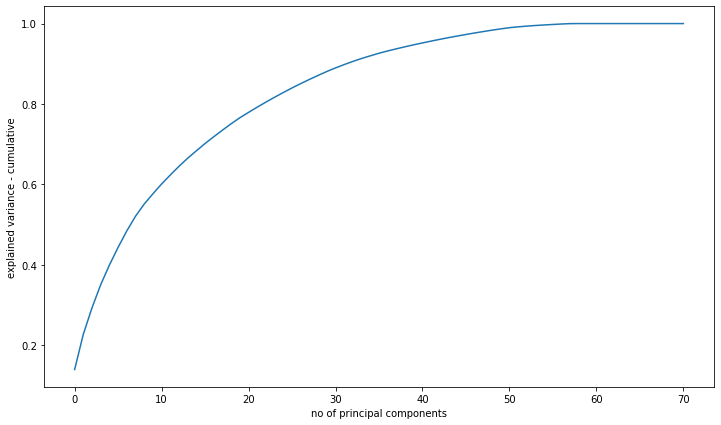

In [821]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [822]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([14. , 22.8, 29.4, 35.1, 40. , 44.4, 48.5, 52.1, 55.1, 57.6, 60.1,
       62.3, 64.5, 66.5, 68.3, 70.1, 71.8, 73.4, 75. , 76.5, 77.8, 79.1,
       80.4, 81.6, 82.8, 83.9, 85. , 86. , 87. , 88. , 88.9, 89.7, 90.5,
       91.2, 91.9, 92.5, 93.1, 93.6, 94.1, 94.6, 95.1, 95.6, 96. , 96.4,
       96.8, 97.2, 97.6, 98. , 98.3, 98.6, 98.9, 99.1, 99.3, 99.5, 99.6,
       99.7, 99.8, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9,
       99.9, 99.9, 99.9, 99.9, 99.9])

In [823]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

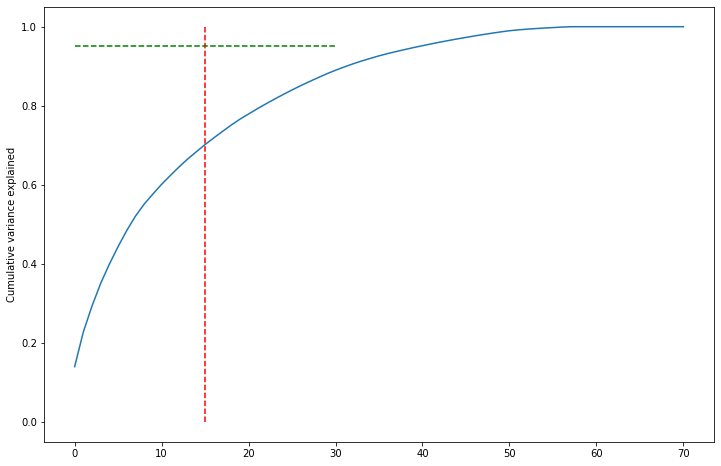

In [824]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [825]:
pca_11 = PCA(n_components=15)

train_pca_11 = pca_11.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_11.shape)

test_pca_11 = pca_11.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_11.shape)

Dimension for Train dataset using PCA:  (38392, 15)
Dimension for Test dataset using PCA:  (8948, 15)


In [826]:
rf_pca_11 = RandomForestClassifier(random_state=42,n_estimators=15,max_depth=3)
rf_pca_11 = rf_pca_11.fit(train_pca_11, y_train_sm)

# making the predictions
y_pred_11 = rf_pca_11.predict(test_pca_11)

# converting the prediction into a dataframe
y_pred_df_11 = pd.DataFrame(y_pred_11)
print("Dimension of y_pred_df_11: ", y_pred_df_11.shape)

Dimension of y_pred_df_11:  (8948, 1)


In [827]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_11),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the Random Forest model with PCA: ",accuracy_score(y_test,y_pred_11))

Confusion Matirx for y_test & y_pred
 [[6712 1552]
 [ 164  520]] 

Accuracy of the Random Forest model with PCA:  0.8082253017434063


In [828]:
scores1=[]
model_f1_score = f1_score(y_test.values.ravel(), y_pred_11)
model_precision_score = precision_score(y_test.values.ravel(), y_pred_11)
model_recall_score = recall_score(y_test.values.ravel(), y_pred_11)
model_accuracy_score = accuracy_score(y_test.values.ravel(), y_pred_11)
model_auc_roc = auc(fpr, tpr)
    
scores1.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   confusion_matrix(y_test.values.ravel(), y_pred_11)
                   ))


In [829]:
sampling_results = pd.DataFrame(scores1, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'confusion_matrix'])
sampling_results

,f1,precision,recall,accuracy,auc_roc,confusion_matrix
0,0.377358,0.250965,0.760234,0.808225,0.8948,"[[6712, 1552], [164, 520]]"


#### Random Forest has a better score than Decision Tree. There is a significant improvement in f1, precision, recall, accuracy and auc_roc in the final model of Random Forest

## Final Inference

The telecom churn analysis is required to predict the customer churn behavior i.e., if a particular customer is likely to churn or not churn. As the problem preview said -

"In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition."

we created about 3 predictive models as mentioned below -

Logistic Regression Model.  
Decision Tree Classifier.  
Random Forest Classifier.  

Out of all the above models, Logistic Regression Model. Technique came out as the winner giving the best metrics of scores.
Let's see the summary of scores for Random Forest Classifier Technique model and how it performed.


| f1 | precision | recall | accuracy | auc_roc | auc_pr | confusion_matrix |
| --- | --- | --- | --- | --- | --- | --- |
| 0.452462 | 0.31878 | 0.77924 | 0.855834 | 0.8948 | 0.49533 | [[7125, 1139], [151, 533]]



    [7125, 1139]
    [151, 533]

1. True Negative = 7125
2. False Positive = 1139
3. False Negative = 151
4. True Positive = 533

Here, Positve == Churn Case and Negative = Non-Churn Case

###  Top  Features affecting churn

In [843]:
feature_importances = pd.DataFrame(rfe.ranking_,
                                   index = X_train_sm.columns,
                                    columns=['importance']).sort_values('importance')

feature_importances[0:10]

,importance
std_ic_mou_action_phase,1
std_og_mou_good_phase,1
total_rech_num_action_phase,1
loc_og_mou_good_phase,1
spl_ic_mou_good_phase,1
roam_og_mou_good_phase,1
total_rech_num_good_phase,1
total_ic_mou_action_phase,1
total_rech_amt_action_phase,1
offnet_mou_good_phase,1


In [857]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
night_pck_user_7,0.171029
std_og_mou_good_phase,0.126986
spl_ic_mou_action_phase,0.082109
night_pck_user_6,0.074394
count_rech_3g_action_phase,0.065806
...,...
total_ic_mou_good_phase,0.000000
total_ic_mou_action_phase,0.000000
total_rech_num_action_phase,0.000000
std_og_mou_action_phase,0.000000


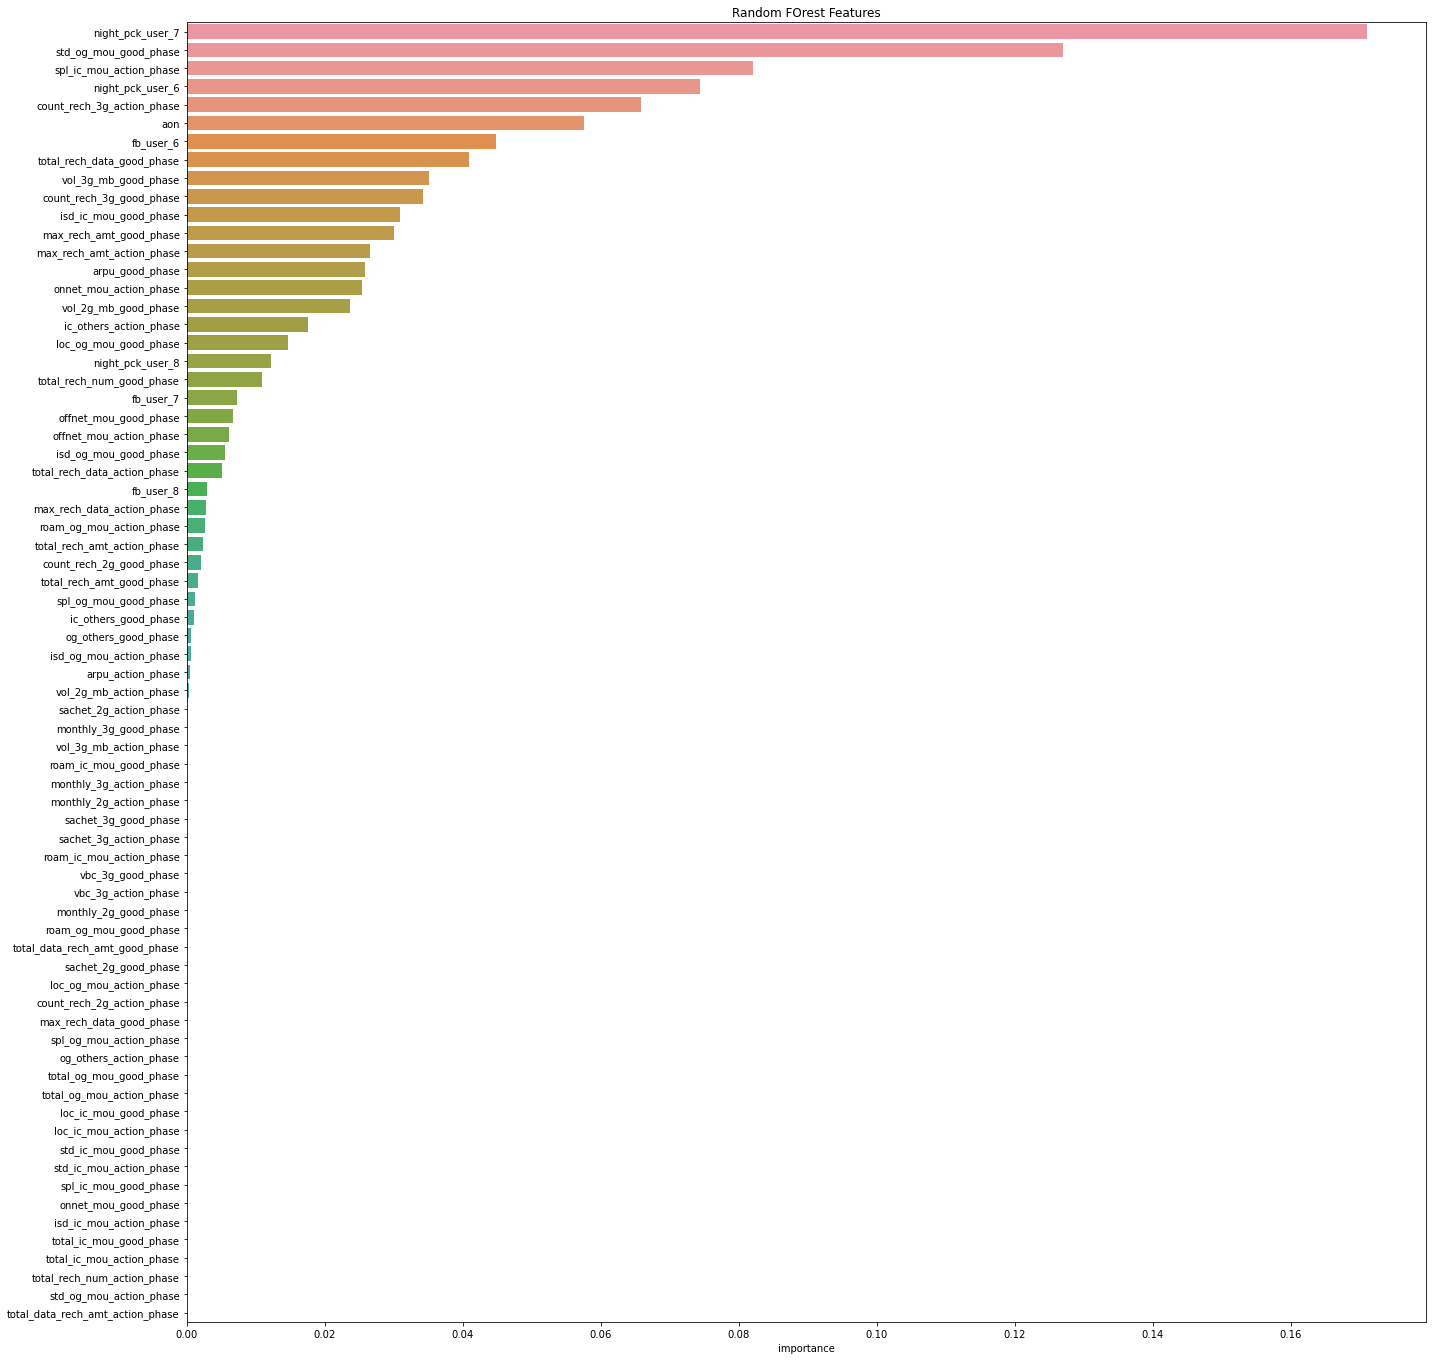

In [858]:
# Plotting the features
plt.figure(figsize=(20, 19))

sns.barplot(x = "importance",
            y = feature_importances.index,
            data = feature_importances.sort_values(by = "importance", ascending = False))

plt.title('Random FOrest Features')
plt.tight_layout()
plt.show()

#### Logistic Regression using RFE

In [861]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))
features_rfe = pd.DataFrame(rfe.ranking_,
                                   index = X_train_sm.columns,
                                    columns=['Ranking']).sort_values('Ranking')

features_rfe

,Ranking
std_ic_mou_action_phase,1
std_og_mou_good_phase,1
total_rech_num_action_phase,1
loc_og_mou_good_phase,1
spl_ic_mou_good_phase,1
...,...
count_rech_3g_good_phase,48
total_og_mou_action_phase,49
night_pck_user_7,50
night_pck_user_6,51


### Important Features


- night_pck_user
- std_og_mou_good_phase
- spl_ic_mou_action_phase
- count_rech_3g_action_phase
- aon
- fb_user_6
- total_ic_mou_good_phase


Our Random Forest model is a decent model. We are able to predict with accuracy of **80.45 %** 

Our Logistic Regression model is a decent model. We are able to predict with accuracy of **85.58 %**

Our goal is to prevent the customers churning.  
best way is to engage with the customers and we have best model to predict who going to churn, we can stop that churning.
This kind of model surely add a value